In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Placement_Data_Full_Class.csv')
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.shape

(215, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [5]:
df.dtypes

Sno                 int64
Gender             object
10th %            float64
SSC Board          object
12th %            float64
HSC Board          object
12th Stream        object
Degree %          float64
Degree stream      object
Work exp           object
specialisation     object
Mba %             float64
status             object
salary            float64
dtype: object

In [6]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Sno            108.000000
10th %          67.303395
12th %          66.333163
Degree %        66.370186
Mba %           62.278186
salary      288655.405405
dtype: float64

In [7]:
df.max()

Sno                    215
Gender                   M
10th %                89.4
SSC Board           Others
12th %                97.7
HSC Board           Others
12th Stream        Science
Degree %              91.0
Degree stream     Sci&Tech
Work exp               Yes
specialisation      Mkt&HR
Mba %                77.89
status              Placed
salary            940000.0
dtype: object

In [8]:
df.min()

Sno                        1
Gender                     F
10th %                 40.89
SSC Board            Central
12th %                  37.0
HSC Board            Central
12th Stream             Arts
Degree %                50.0
Degree stream      Comm&Mgmt
Work exp                  No
specialisation       Mkt&Fin
Mba %                  51.21
status            Not Placed
salary              200000.0
dtype: object

In [9]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Sno         0.000000
10th %     -0.132649
12th %      0.163639
Degree %    0.244917
Mba %       0.313576
salary      3.569747
dtype: float64

In [10]:
df.isnull().sum()

Sno                0
Gender             0
10th %             0
SSC Board          0
12th %             0
HSC Board          0
12th Stream        0
Degree %           0
Degree stream      0
Work exp           0
specialisation     0
Mba %              0
status             0
salary            67
dtype: int64

In [11]:
df=df.fillna(0)

In [12]:
df.describe()

,Sno,10th %,12th %,Degree %,Mba %,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,77.890000,940000.000000


In [13]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,6.0,0.128787,0.429473,-0.088281,-0.083822,-0.037806,0.017381,1.0
10th %,6.0,0.483048,0.345842,-0.078155,0.419226,0.524781,0.538325,1.0
12th %,6.0,0.444560,0.347103,-0.085711,0.374668,0.443387,0.496746,1.0
Degree %,6.0,0.449177,0.347652,-0.088281,0.403866,0.421288,0.512354,1.0
Mba %,6.0,0.384636,0.337962,0.022327,0.193573,0.371650,0.398892,1.0
salary,6.0,0.423566,0.347630,0.002543,0.206960,0.430470,0.516709,1.0


In [15]:
df.duplicated().sum()

0

In [16]:
df.describe().round()

,Sno,10th %,12th %,Degree %,Mba %,salary
count,215.0,215.0,215.0,215.0,215.0,215.0
mean,108.0,67.0,66.0,66.0,62.0,198702.0
std,62.0,11.0,11.0,7.0,6.0,154781.0
min,1.0,41.0,37.0,50.0,51.0,0.0
25%,54.0,61.0,61.0,61.0,58.0,0.0
50%,108.0,67.0,65.0,66.0,62.0,240000.0
75%,162.0,76.0,73.0,72.0,66.0,282500.0
max,215.0,89.0,98.0,91.0,78.0,940000.0


In [17]:
def barplot(col,col1,datas,color):
    sns.barplot(x=col, y=col1 ,data=datas, palette=color)
    plt.show()

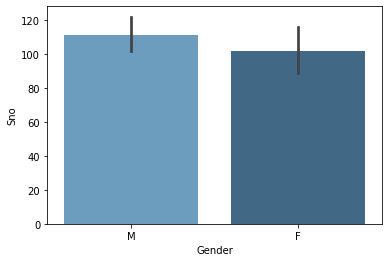

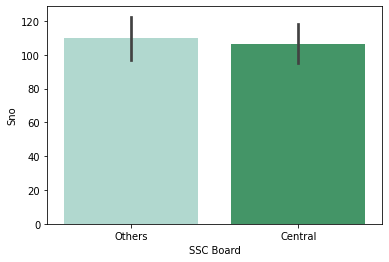

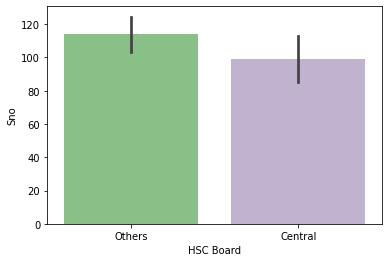

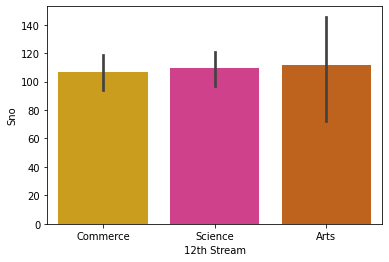

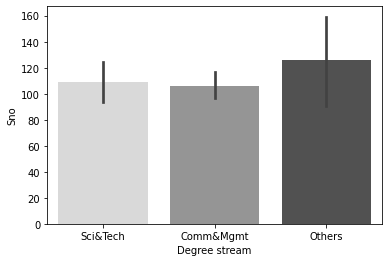

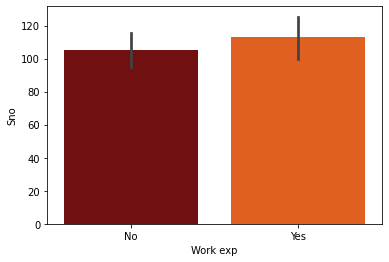

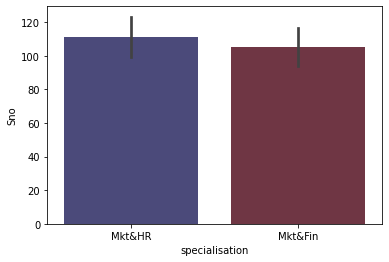

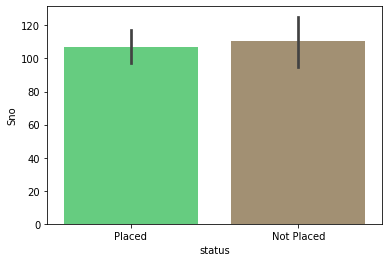

In [19]:
barplot('Gender','Sno',df,'Blues_d')
barplot('SSC Board','Sno',df,'BuGn')
barplot('HSC Board','Sno',df,'Accent')
barplot('12th Stream','Sno',df,'Dark2_r') 
barplot('Degree stream','Sno',df,'Greys')
barplot('Work exp','Sno',df,'gist_heat')
barplot('specialisation','Sno',df,'icefire')
barplot('status','Sno',df,'terrain') 

In [20]:
def barplot(col,col1,datas,cr,color):
    sns.barplot(x=col, y=col1 ,data=datas,hue=cr, palette=color)
    plt.show()

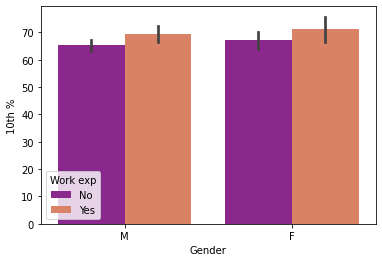

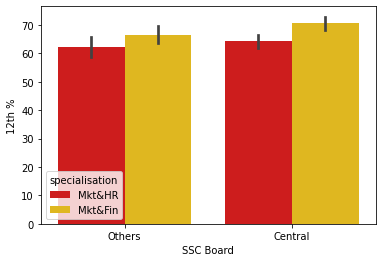

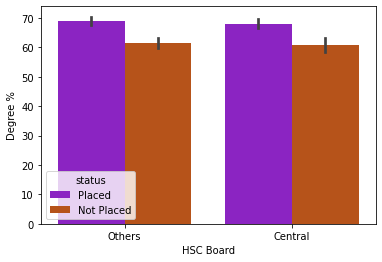

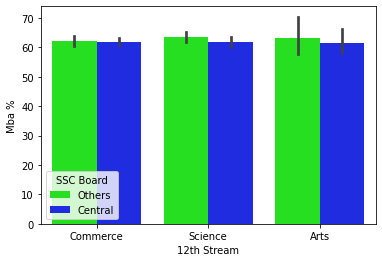

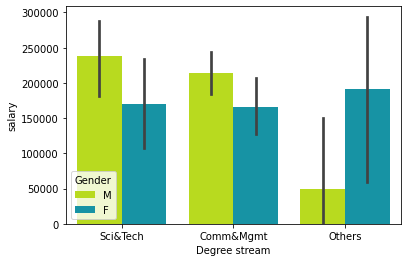

In [21]:
barplot('Gender','10th %',df,'Work exp', 'plasma')
barplot('SSC Board','12th %',df,'specialisation', 'hot')
barplot('HSC Board','Degree %',df,'status', 'gnuplot')
barplot('12th Stream','Mba %',df,'SSC Board', 'hsv')
barplot('Degree stream','salary',df,'Gender', 'nipy_spectral_r')

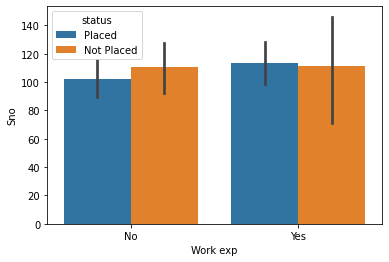

In [22]:
sns.barplot(x='Work exp', y='Sno', hue='status', data=df)
plt.show()

In [24]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Sno" is
 1      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
215    1
Name: Sno, Length: 215, dtype: int64
-------------------------------------------------
unique values in column "Gender" is
 M    139
F     76
Name: Gender, dtype: int64
-------------------------------------------------
unique values in column "10th %" is
 62.00    11
63.00    10
67.00     9
52.00     9
73.00     9
         ..
69.70     1
80.92     1
83.00     1
86.50     1
80.60     1
Name: 10th %, Length: 103, dtype: int64
-------------------------------------------------
unique values in column "SSC Board" is
 Central    116
Others      99
Name: SSC Board, dtype: int64
-------------------------------------------------
unique values in column "12th %" is
 63.00    14
62.00    12
67.00     9
60.00     9
64.00     8
         ..
83.83     1
70.40     1
90.90     1
89.83     1
42.00     1
Name: 12th %, Length: 97, dtype: int64
-------------------------------

In [26]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [27]:
object_col

['Gender',
 'SSC Board',
 'HSC Board',
 '12th Stream',
 'Degree stream',
 'Work exp',
 'specialisation',
 'status']

In [28]:
num_col

['Sno', '10th %', '12th %', 'Degree %', 'Mba %', 'salary']

In [29]:
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


In [30]:
df.columns

Index(['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status', 'salary'],
      dtype='object')

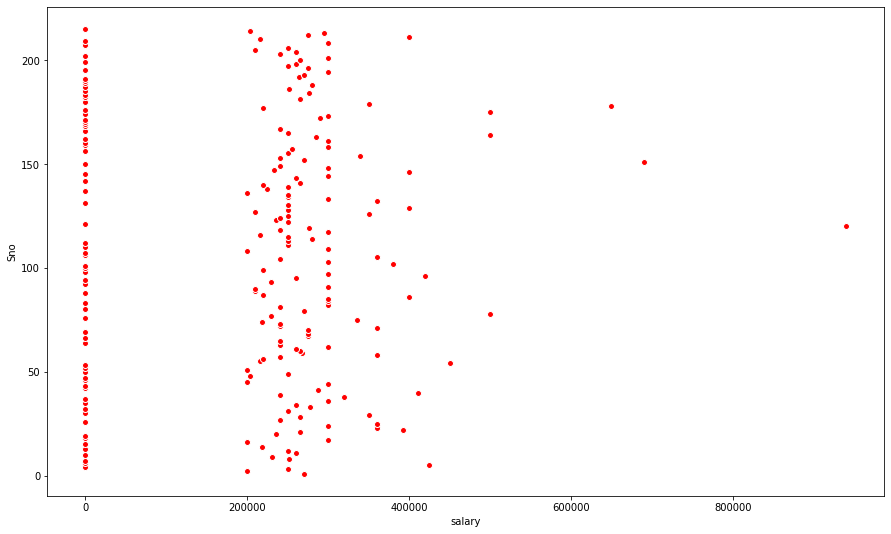

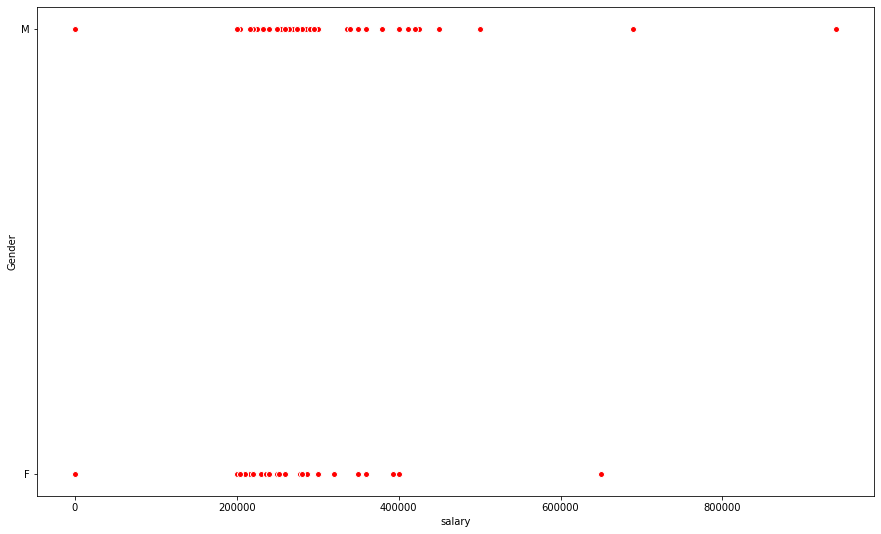

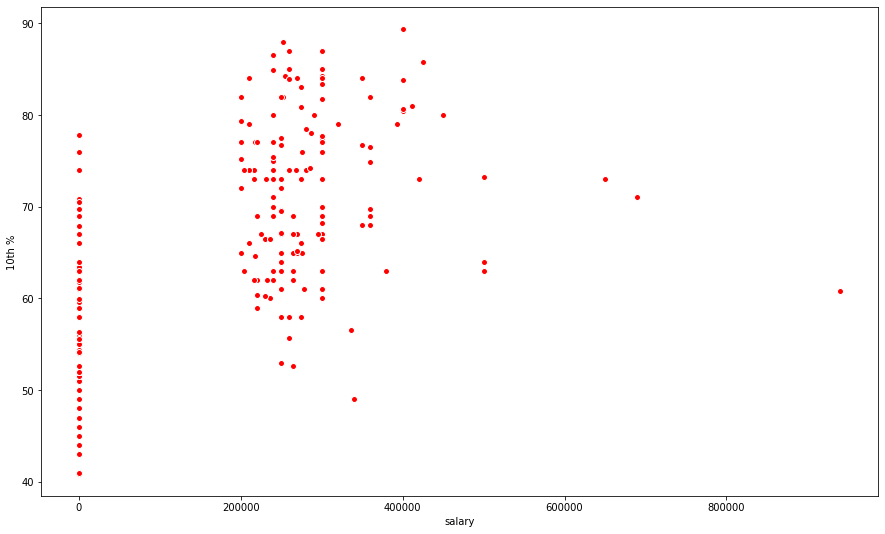

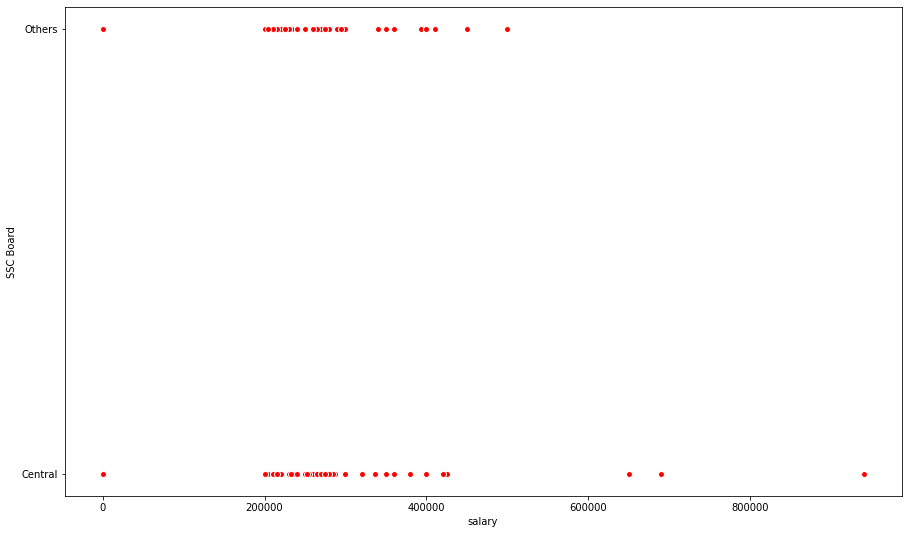

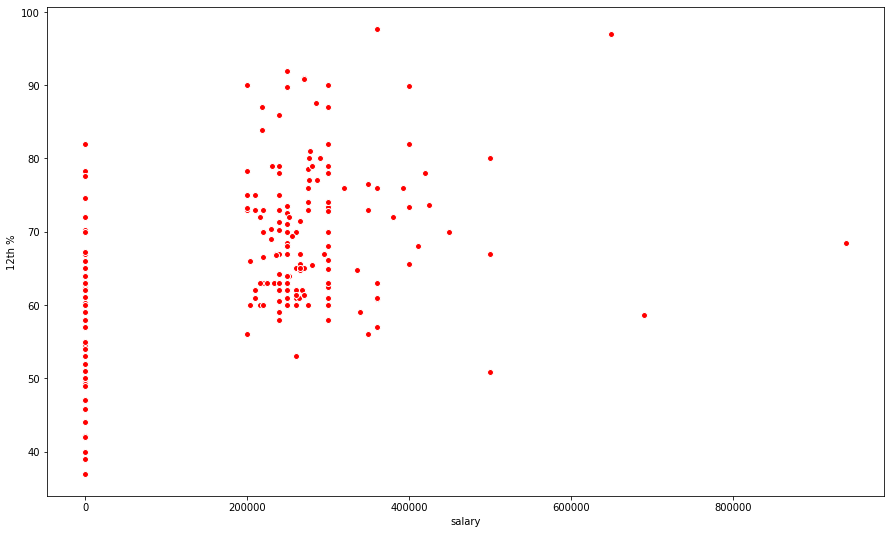

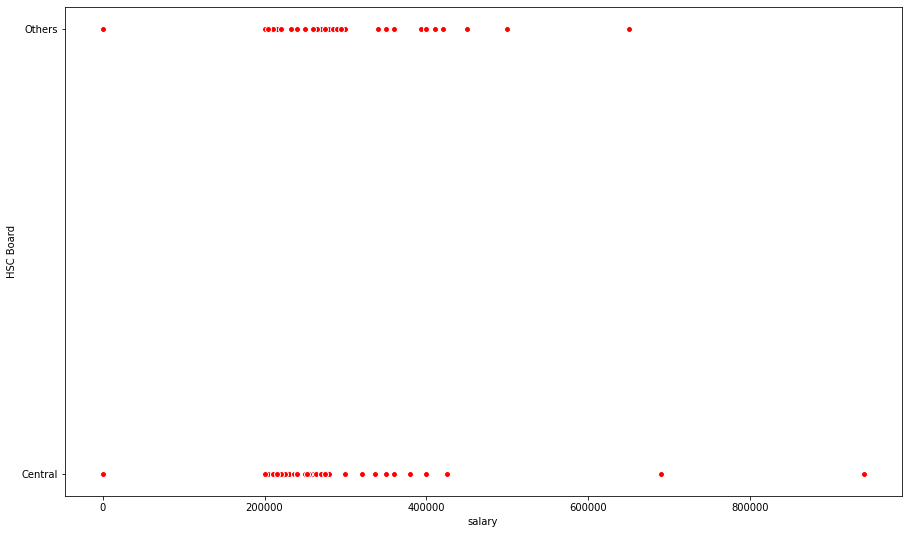

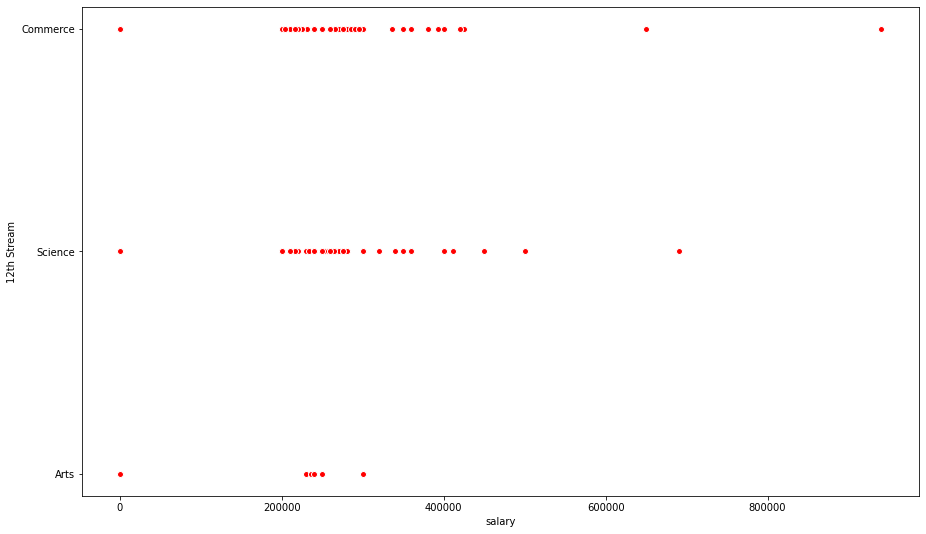

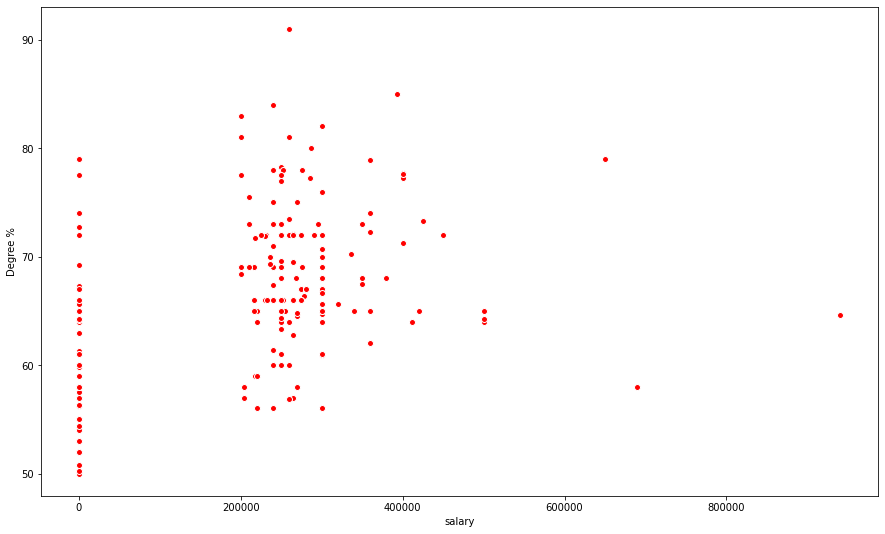

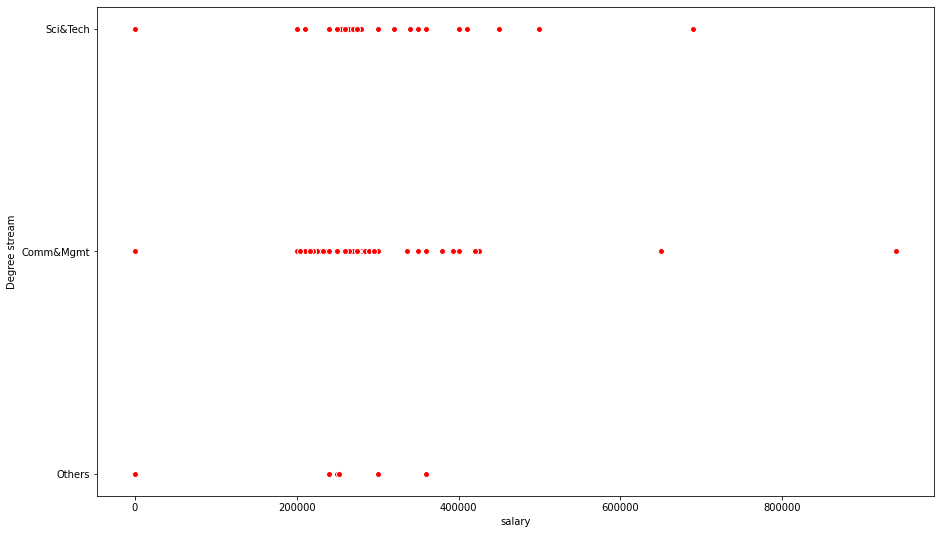

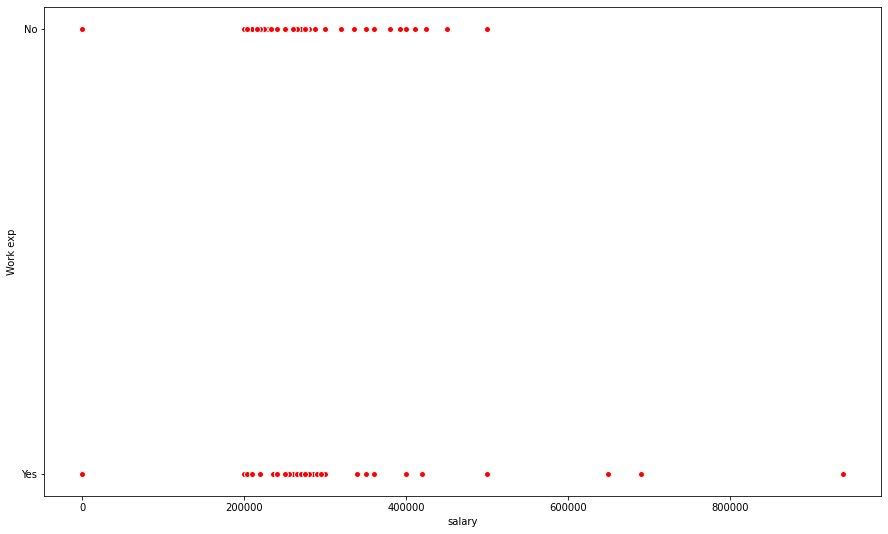

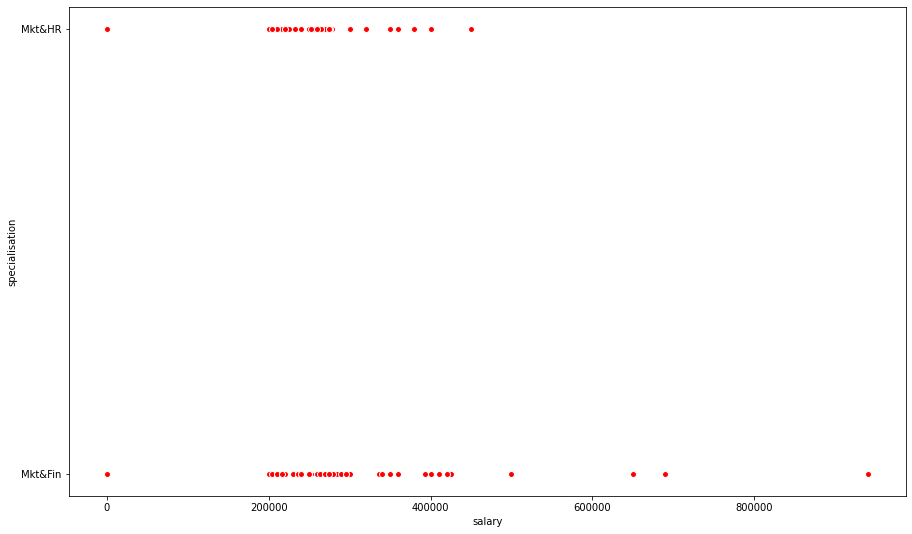

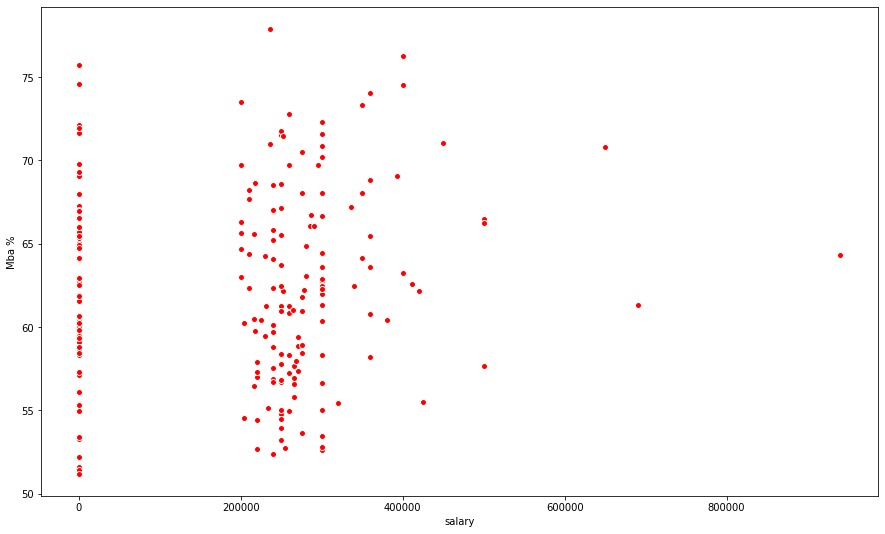

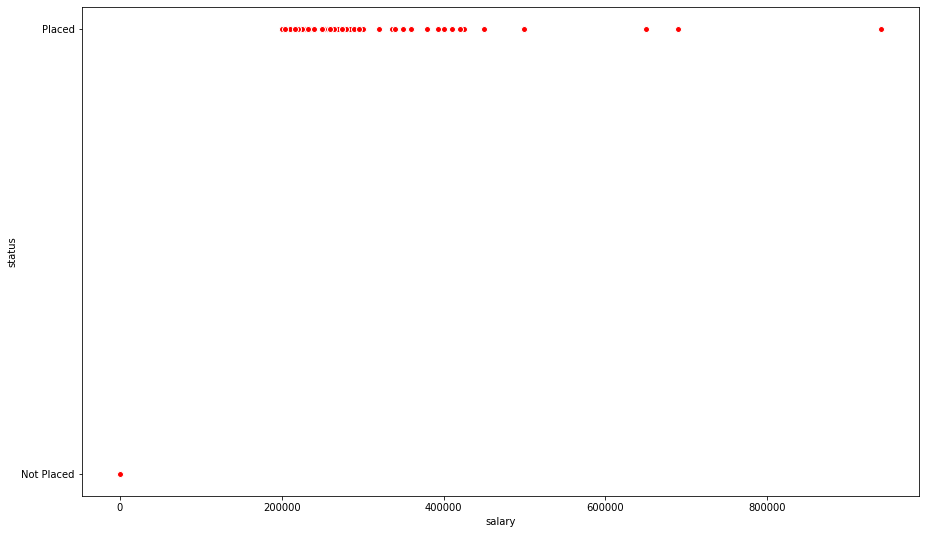

In [35]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

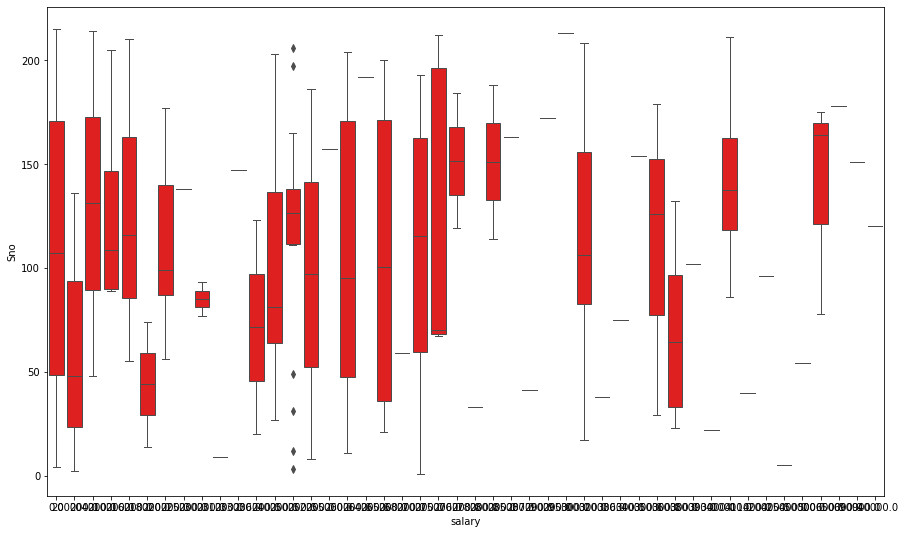

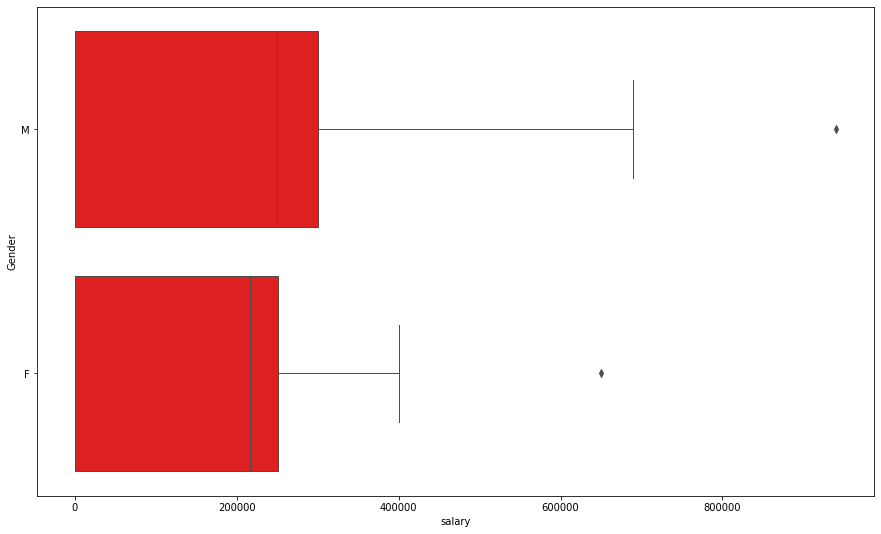

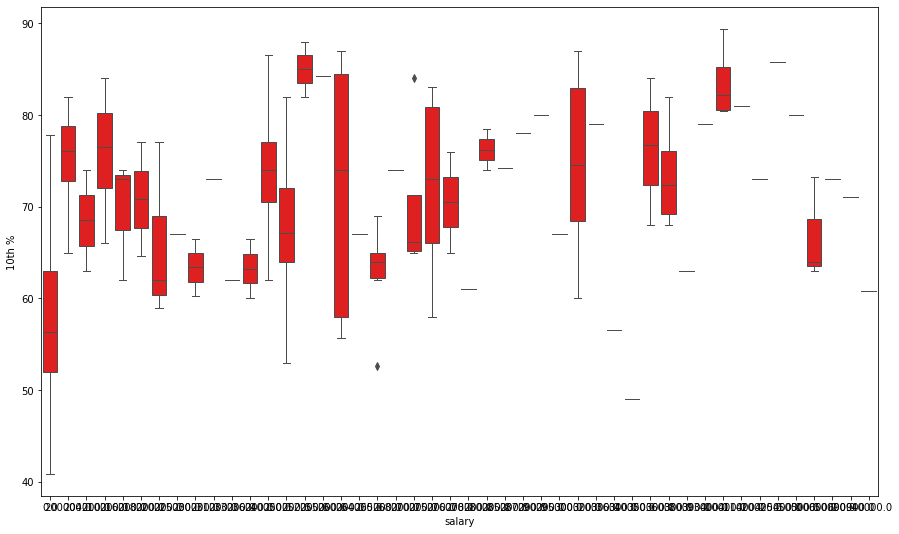

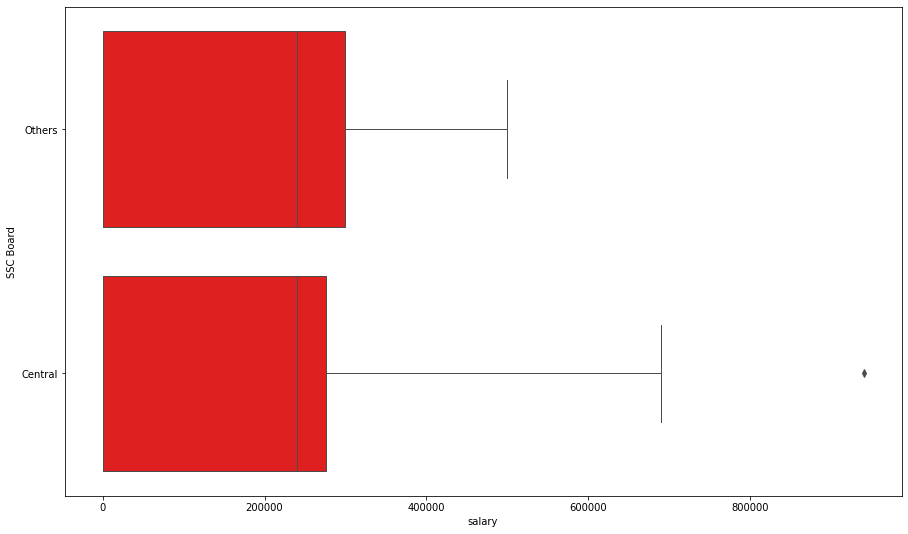

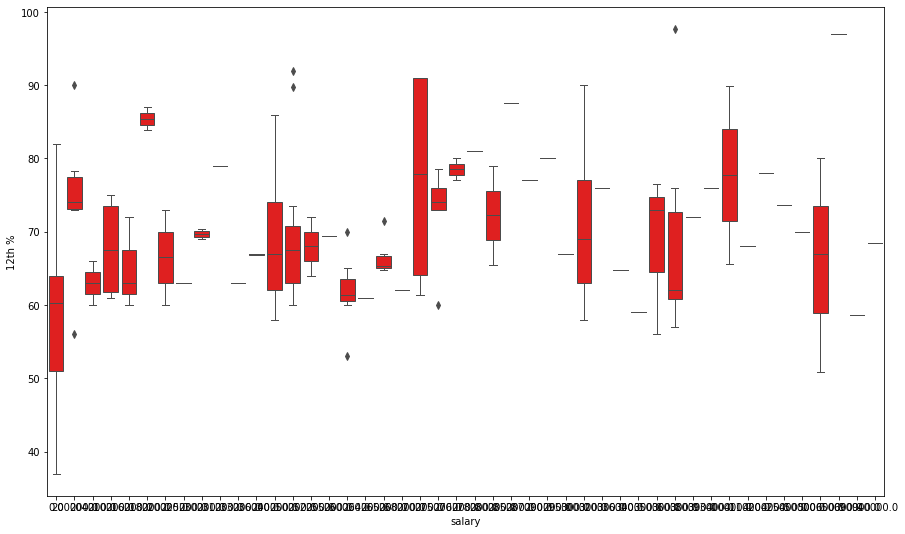

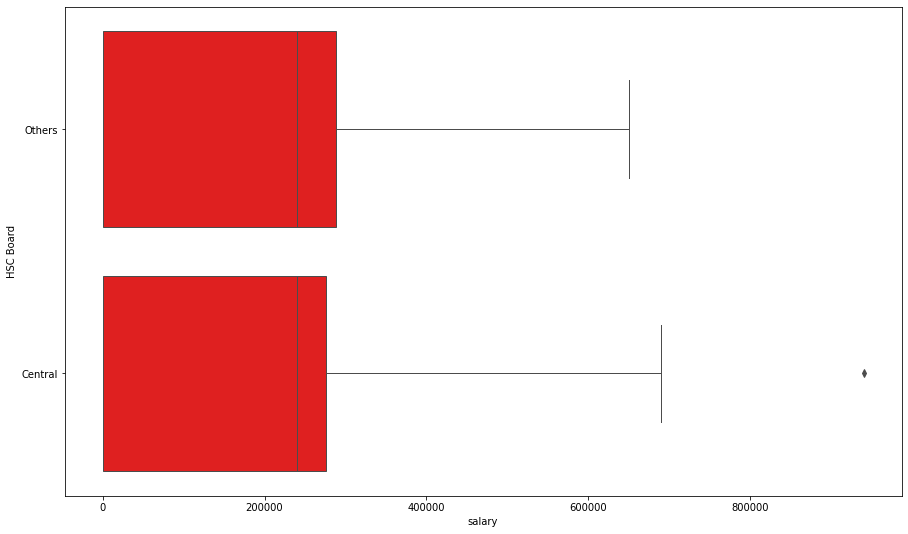

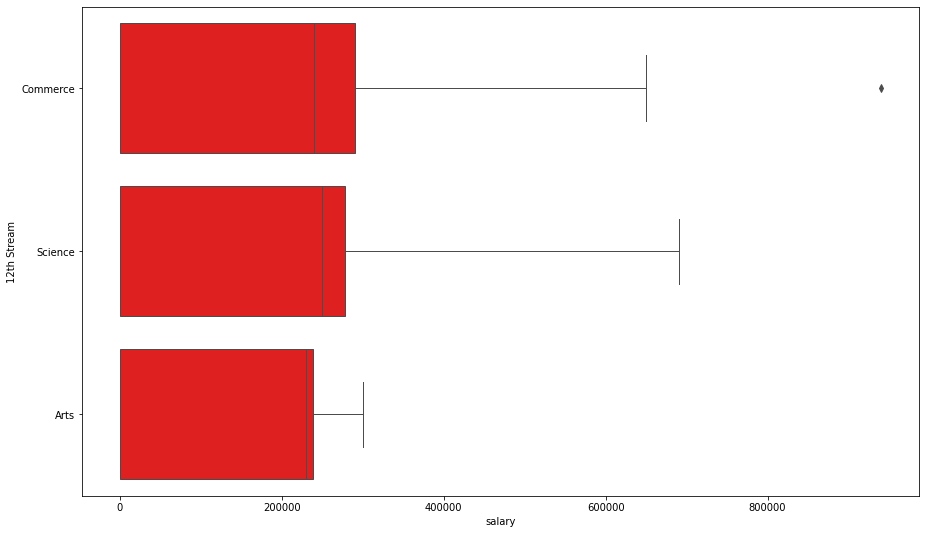

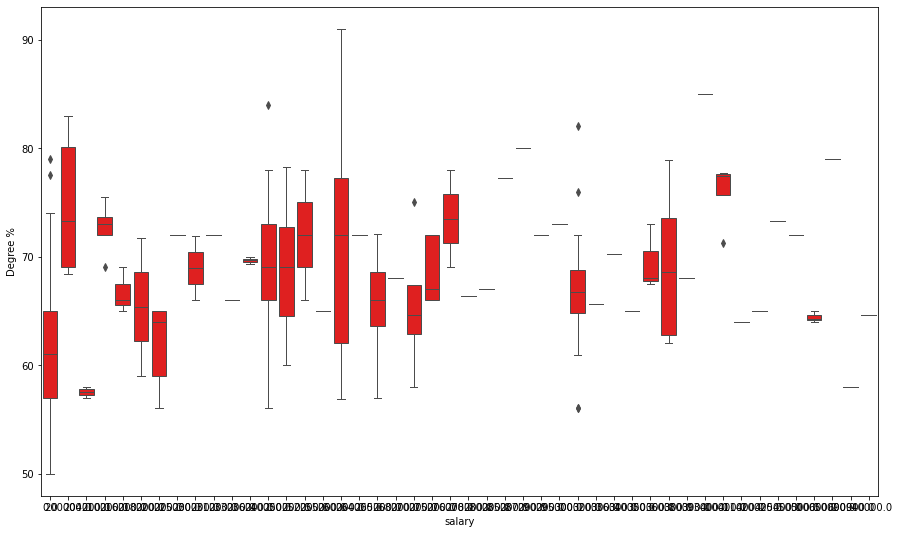

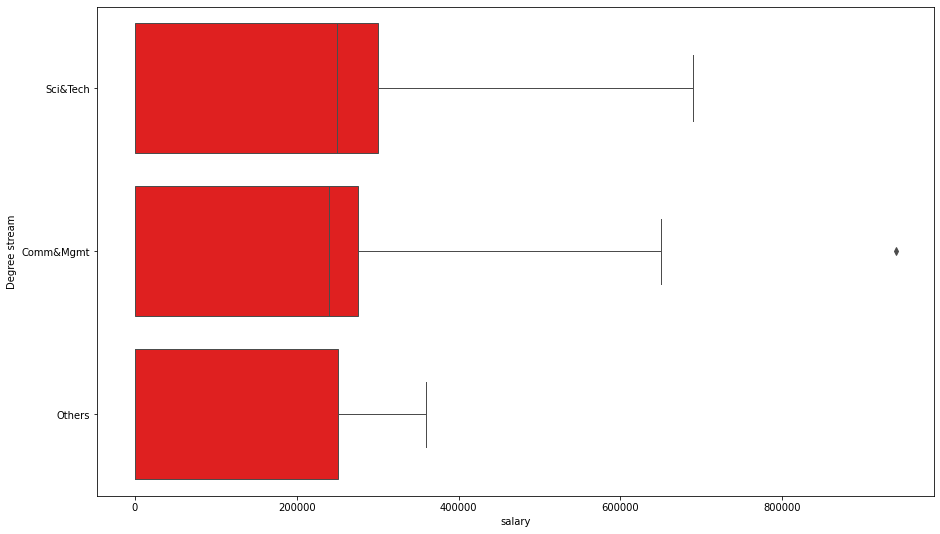

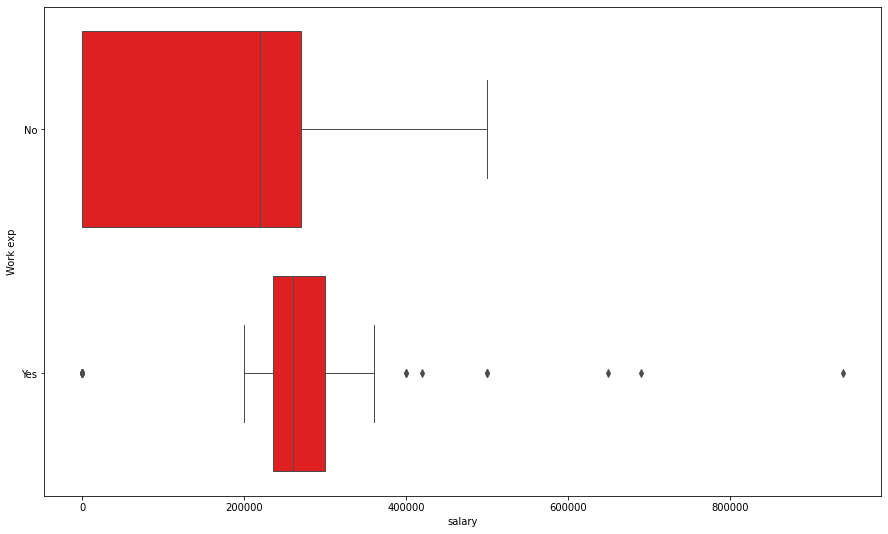

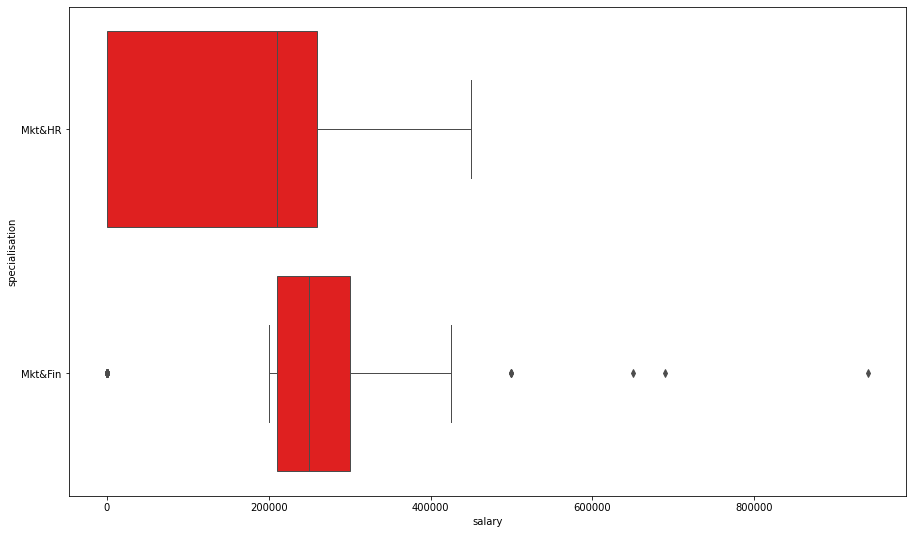

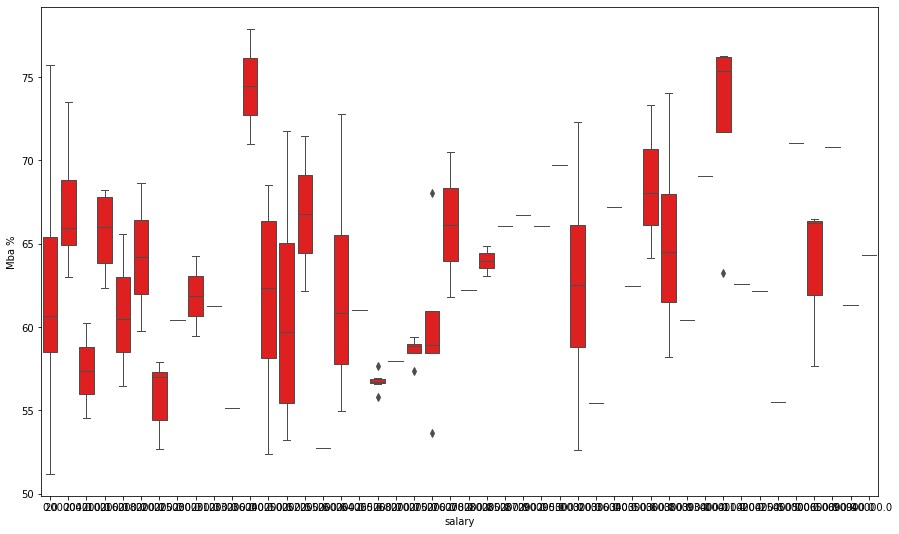

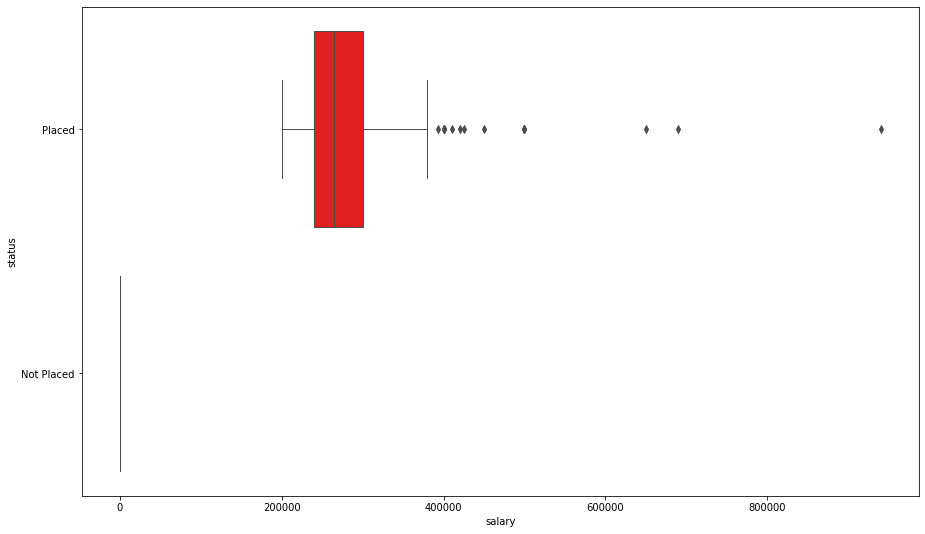

In [36]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

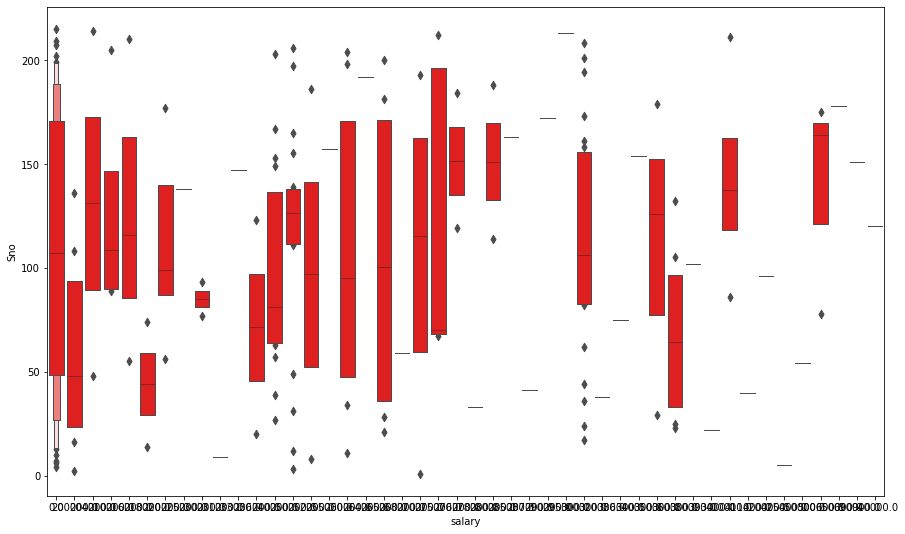

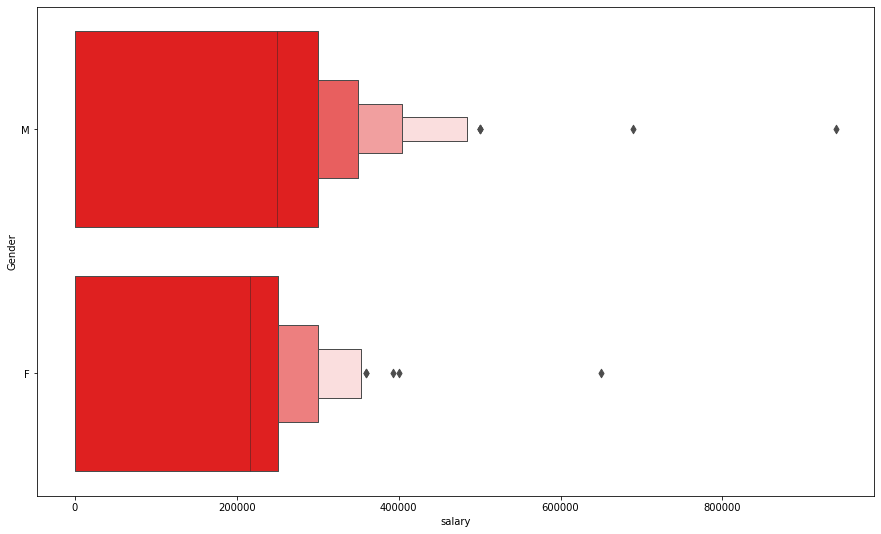

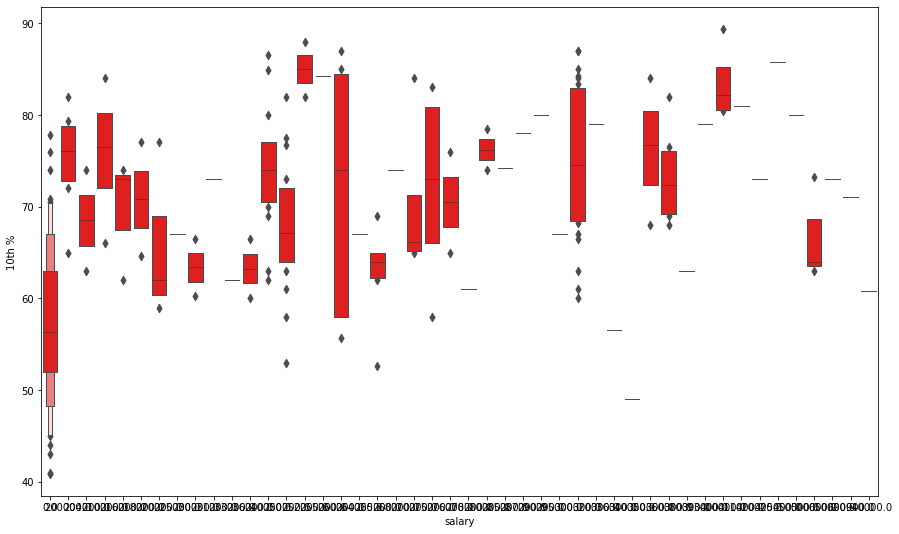

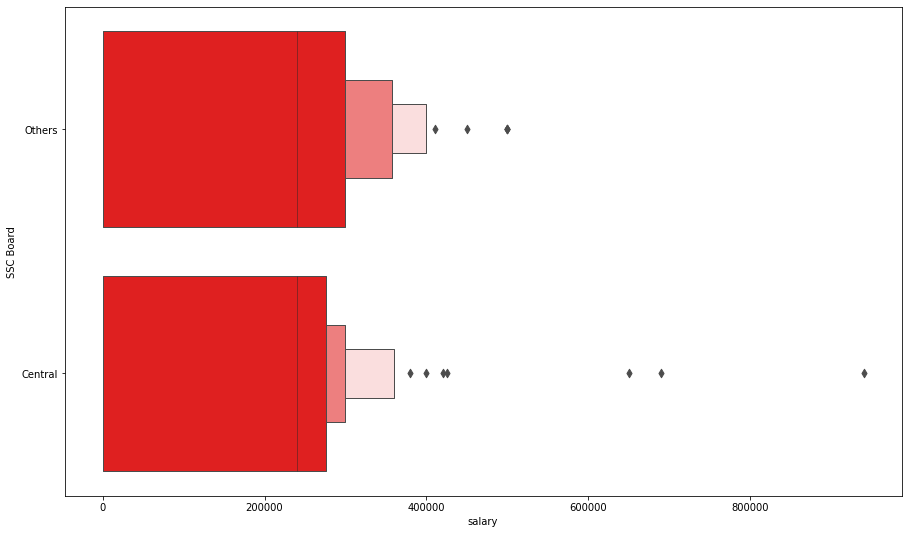

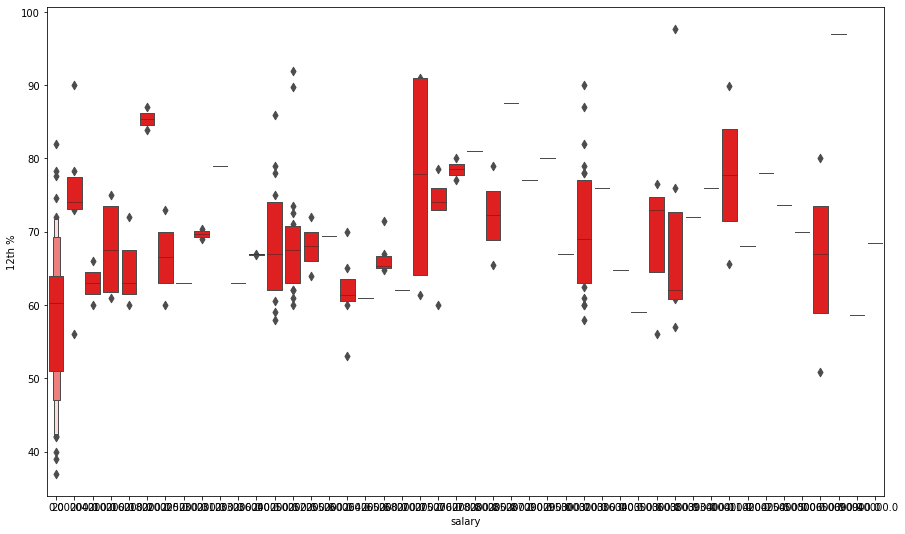

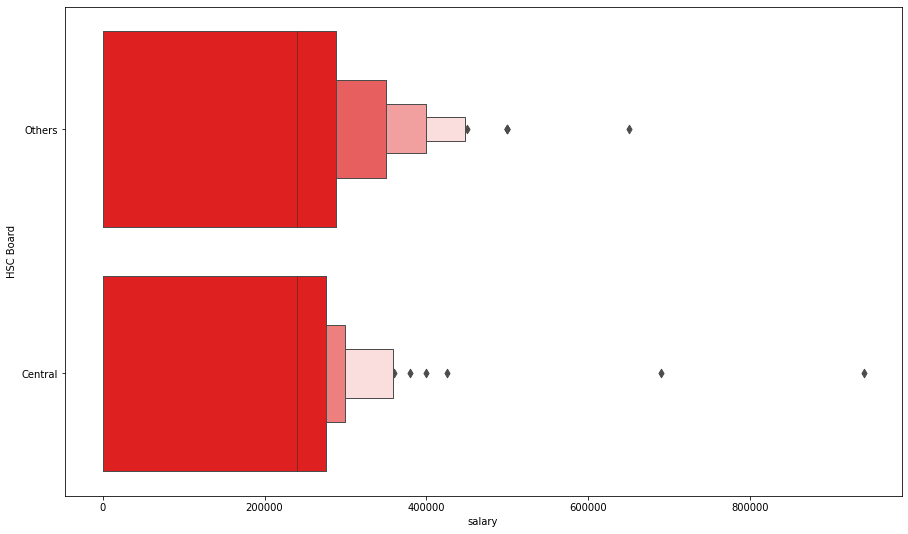

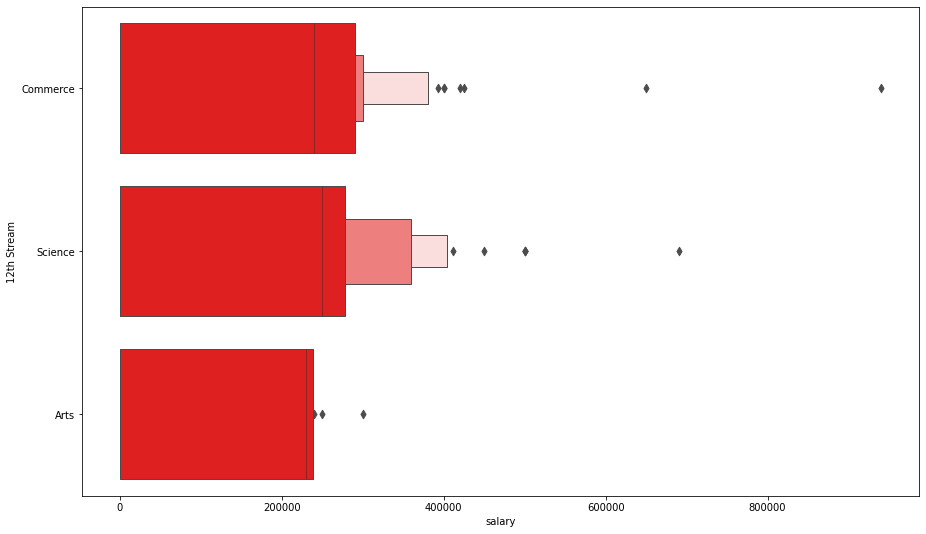

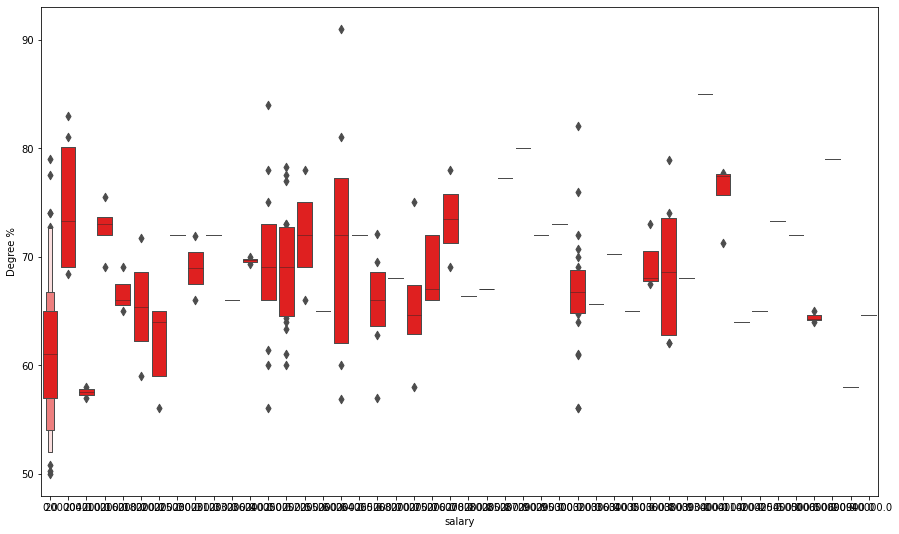

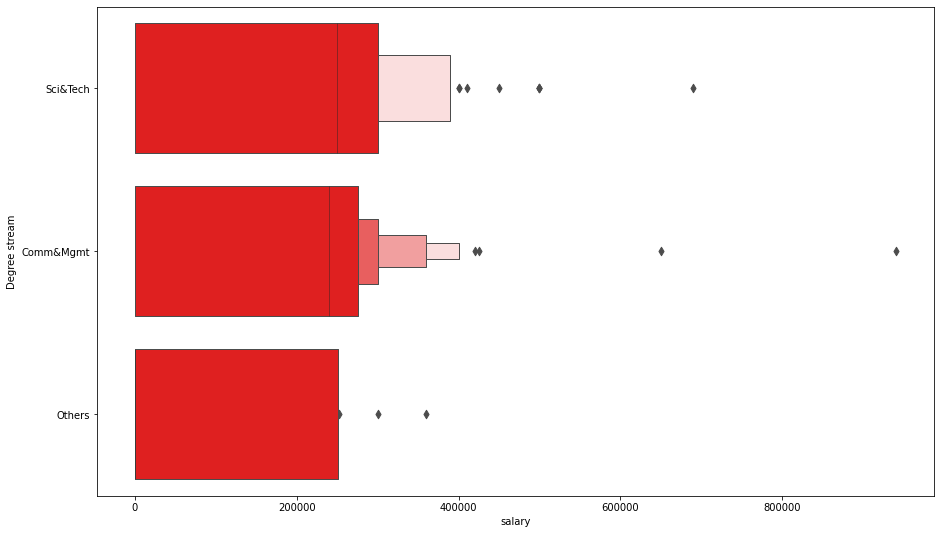

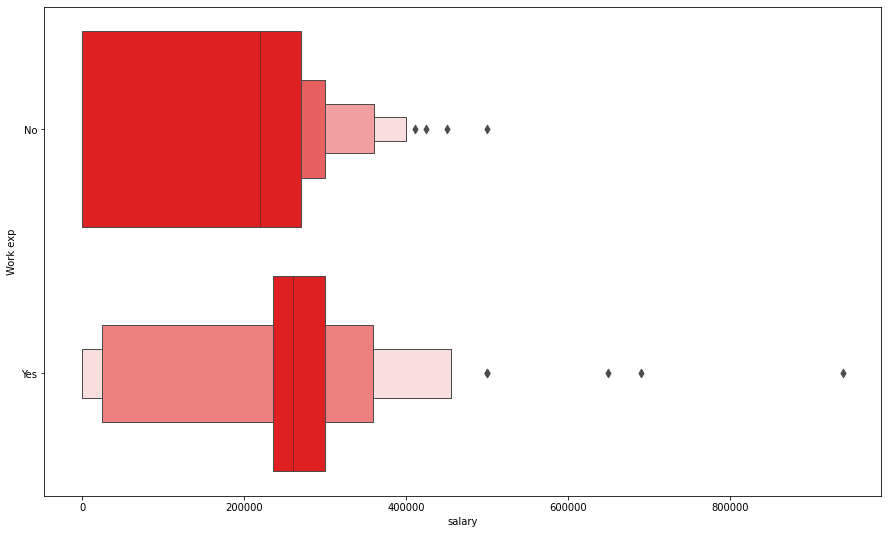

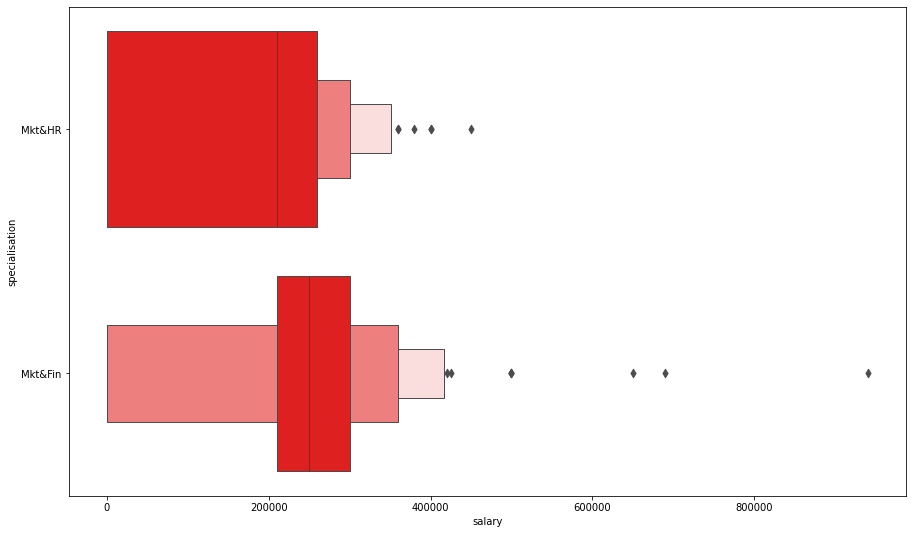

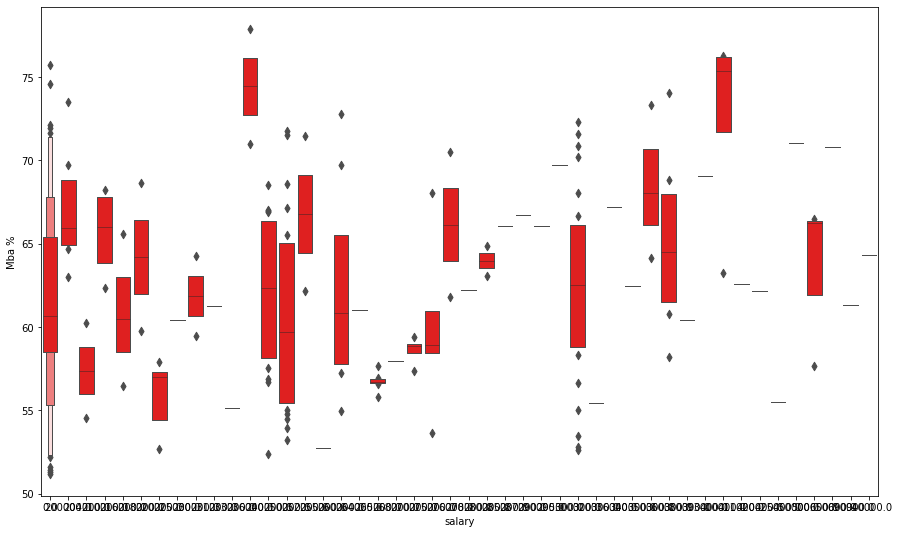

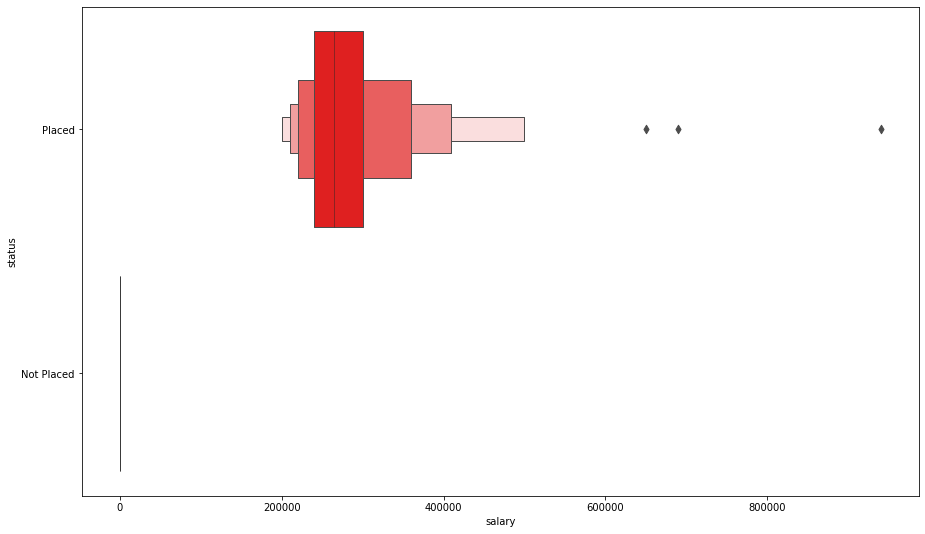

In [38]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

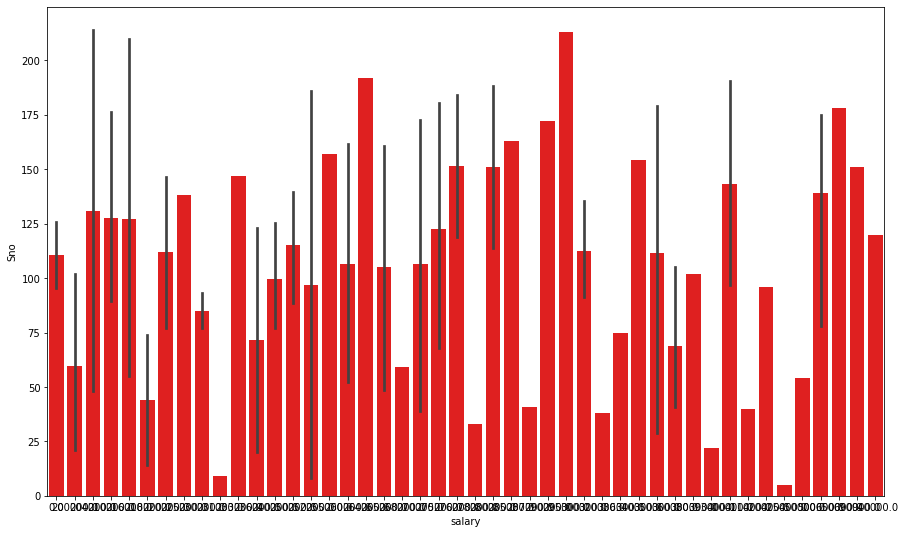

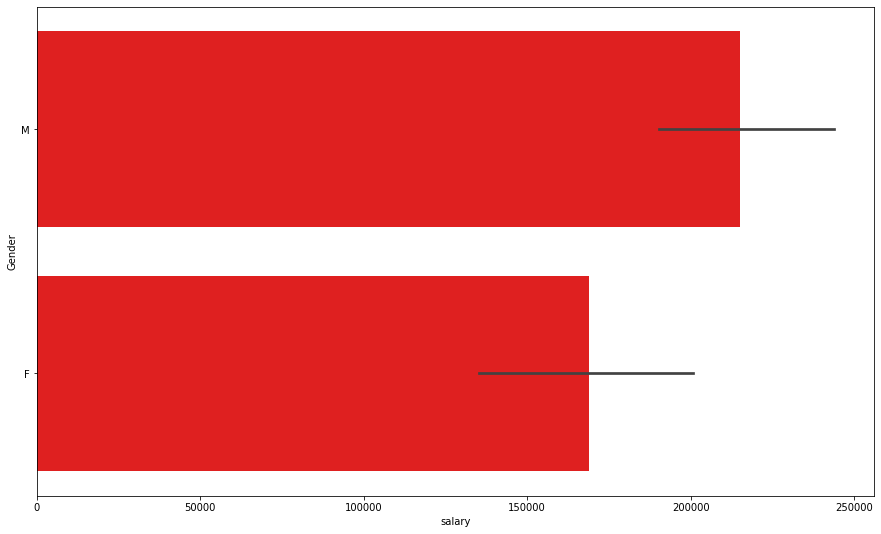

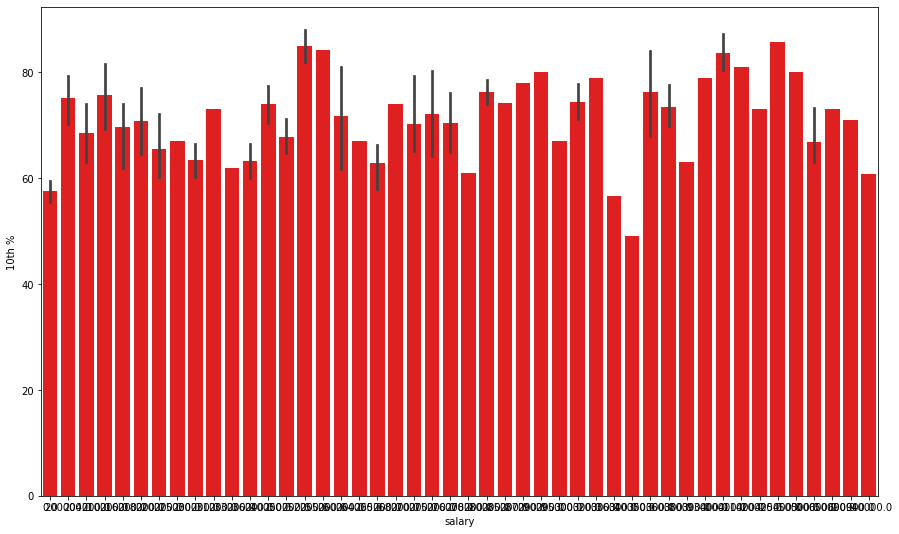

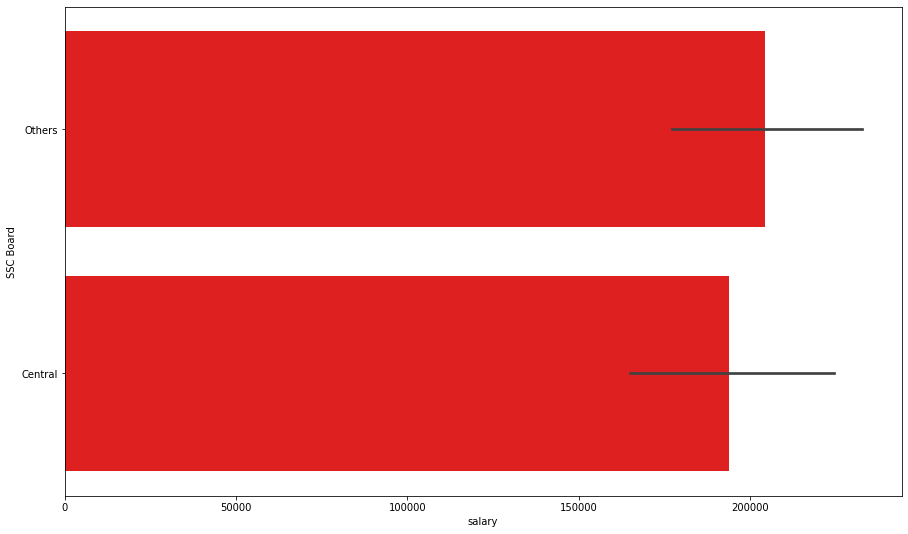

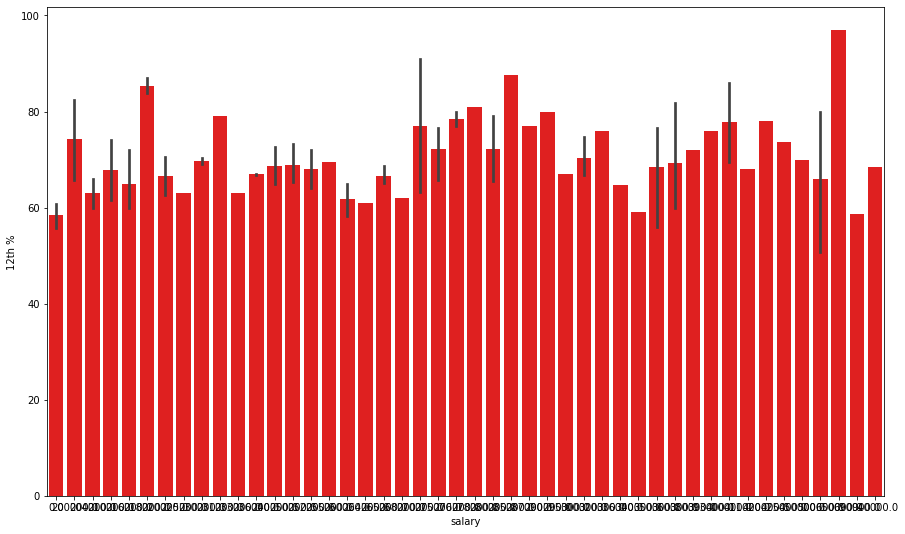

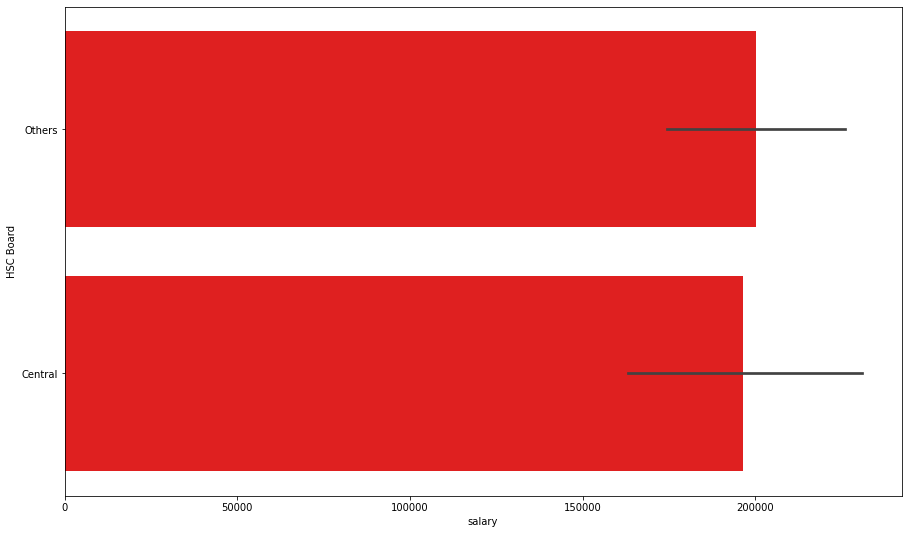

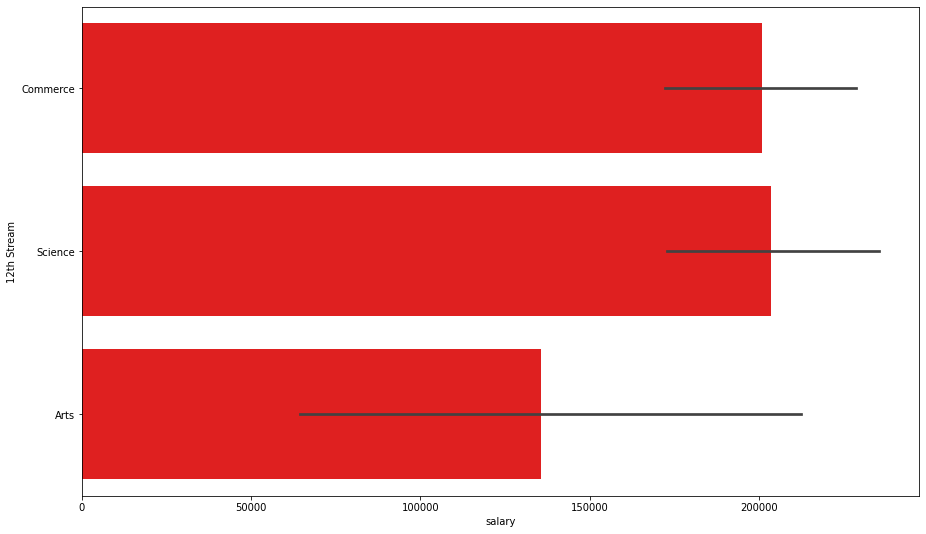

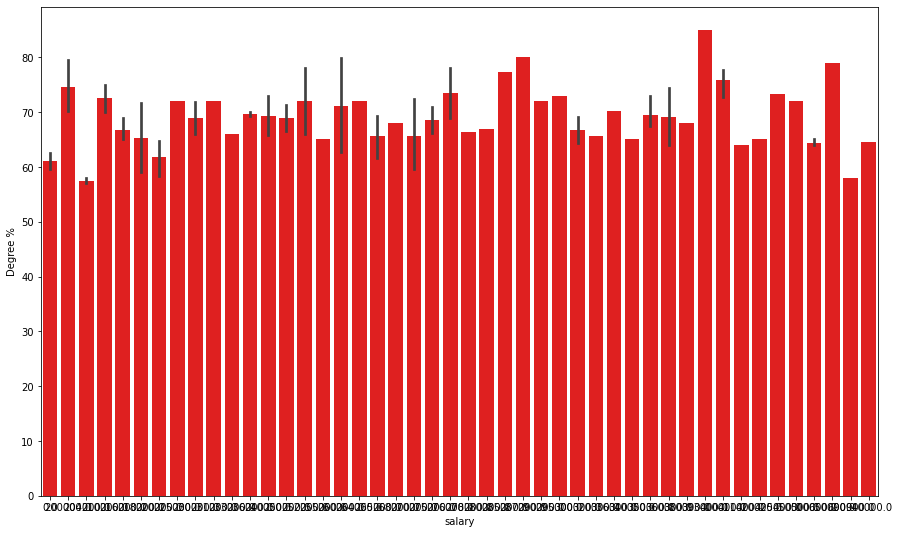

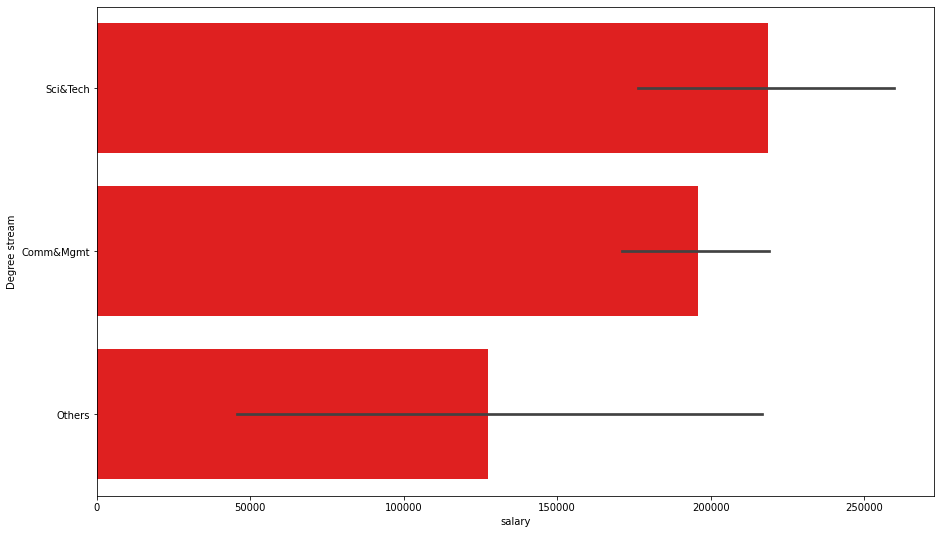

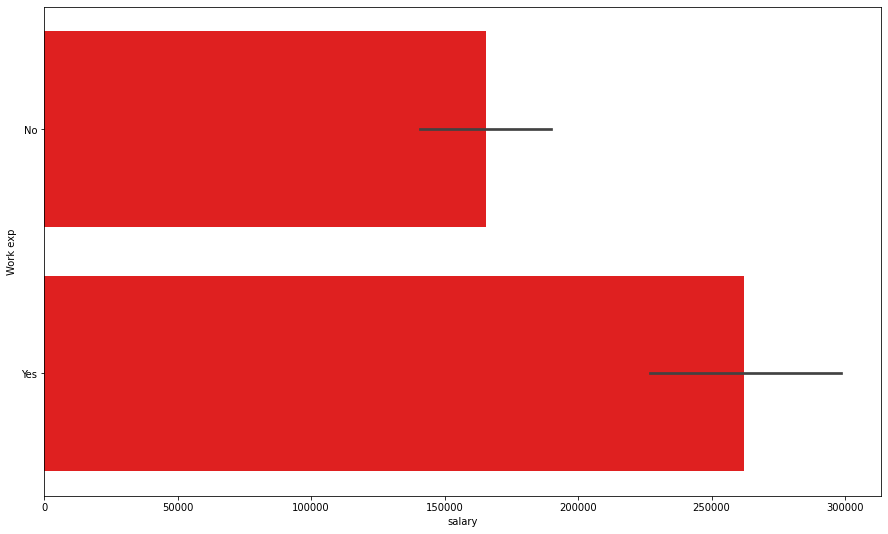

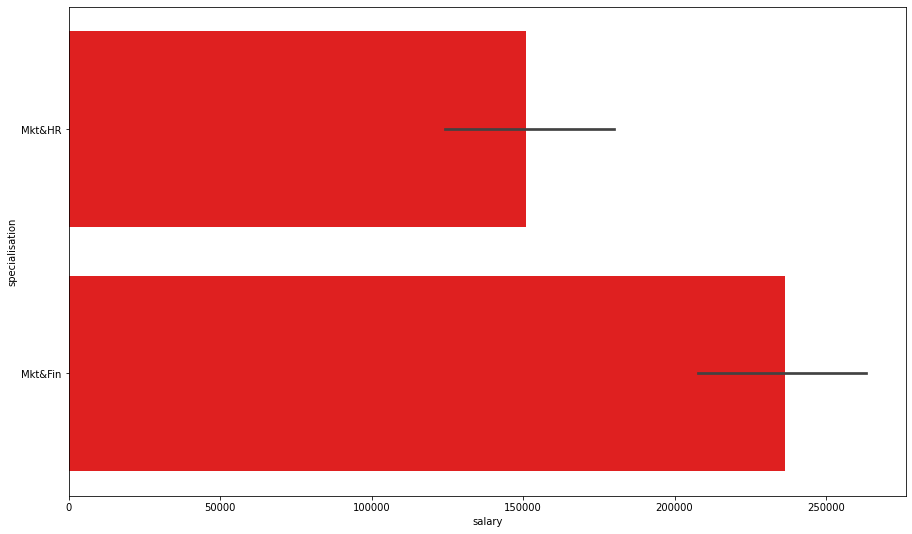

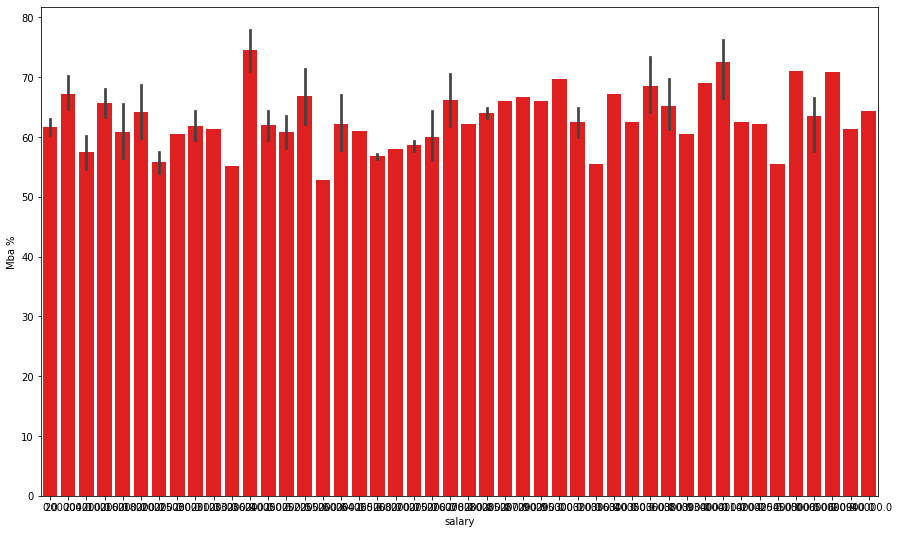

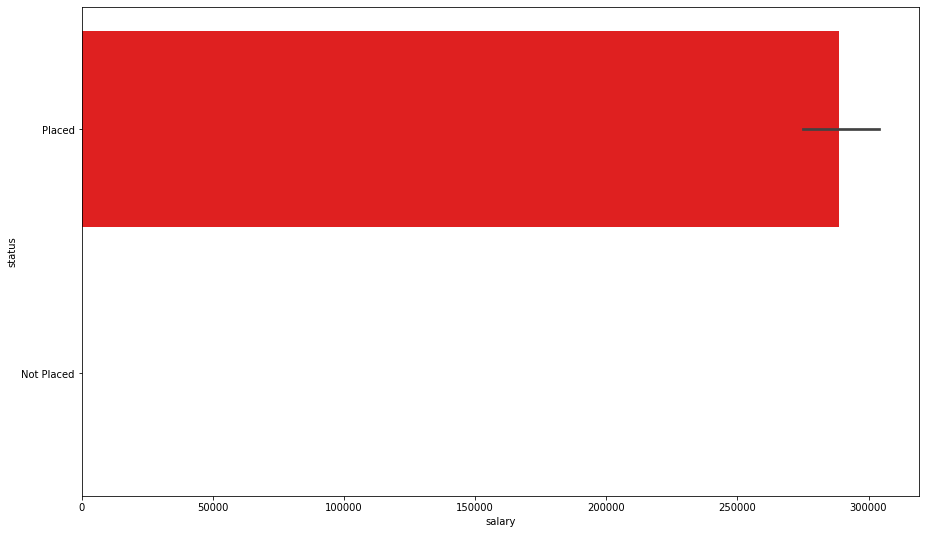

In [39]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.fiagure(figsize=(15,9))
    sns.barplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

<AxesSubplot:xlabel='salary', ylabel='Density'>

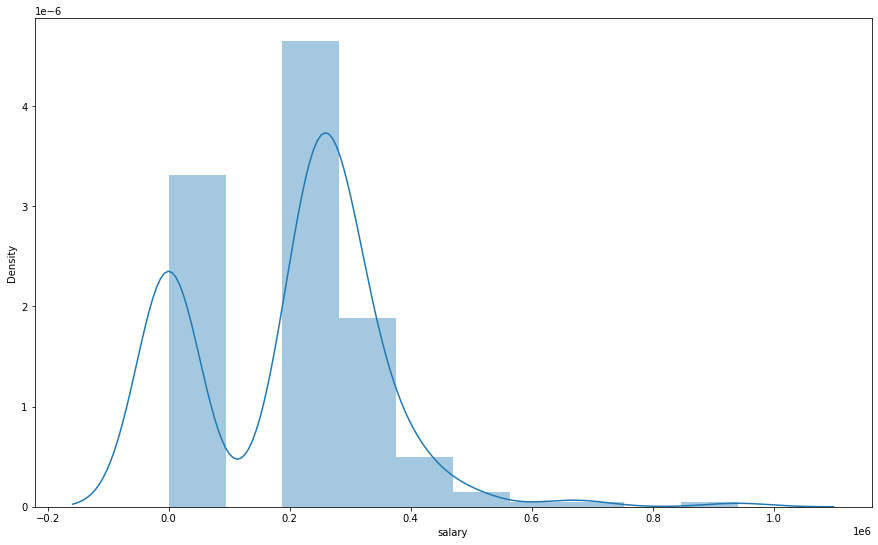

In [41]:
plt.figure(figsize=(15,9))
sns.distplot(df['salary'])

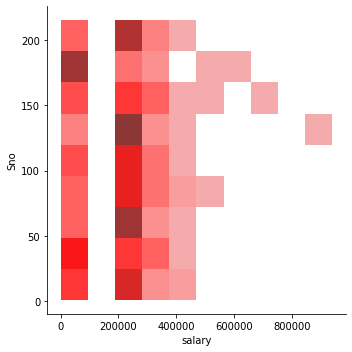

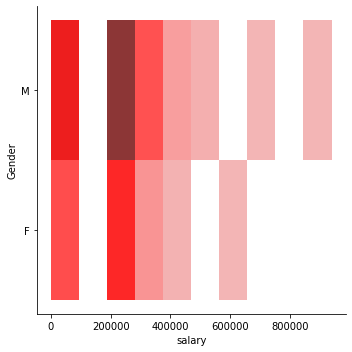

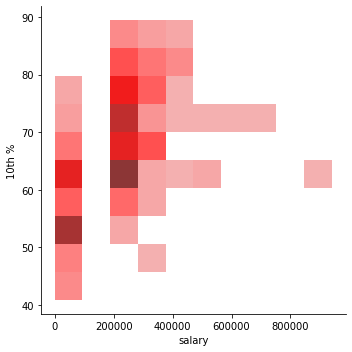

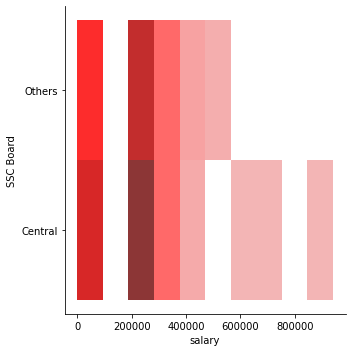

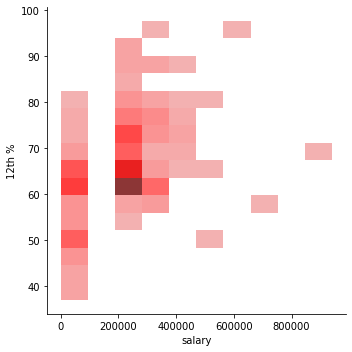

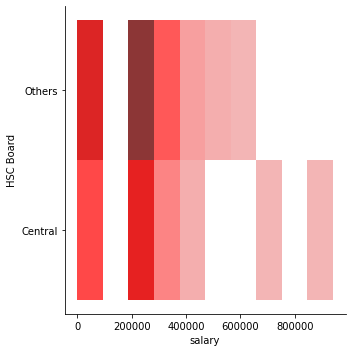

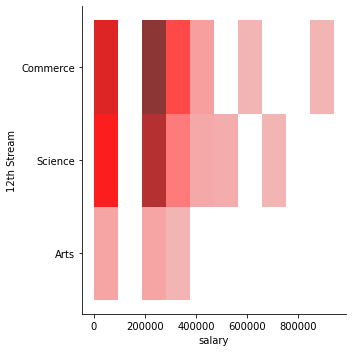

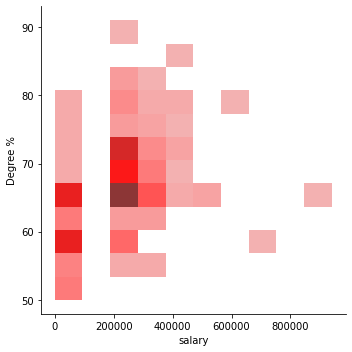

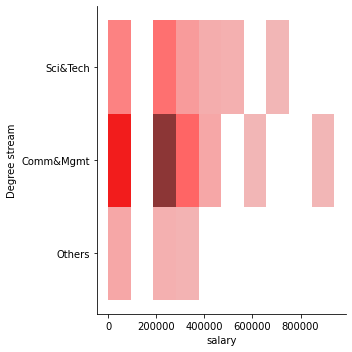

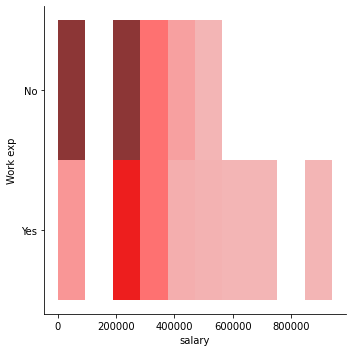

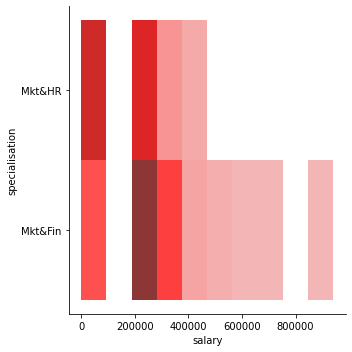

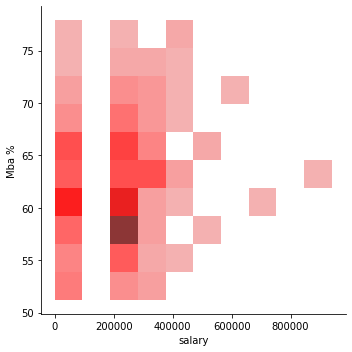

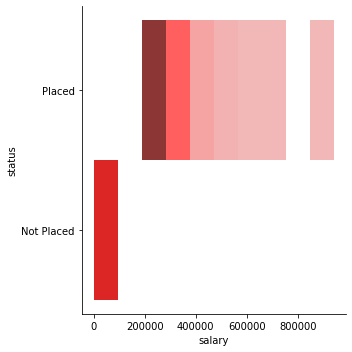

In [43]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    
    sns.displot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

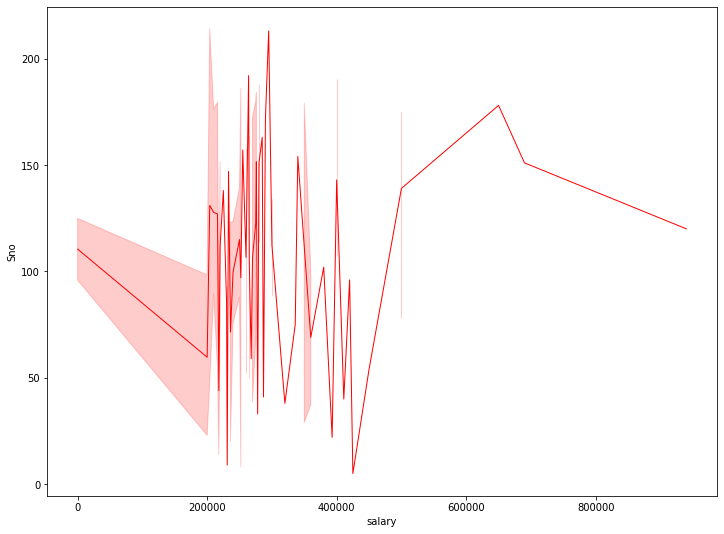

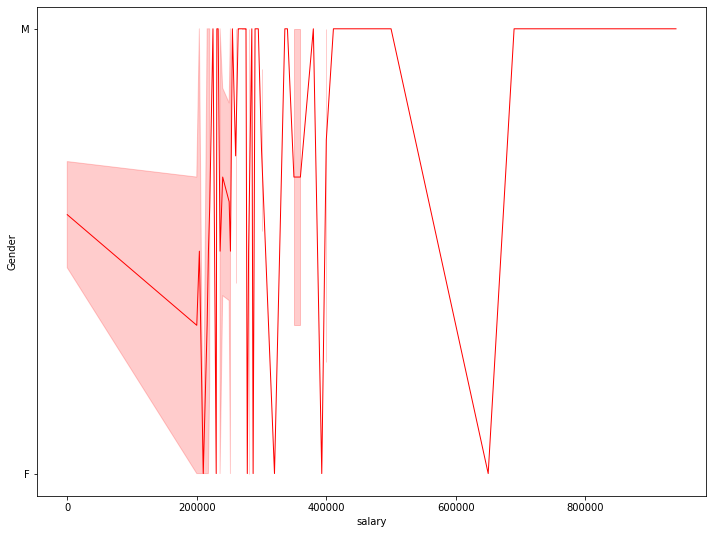

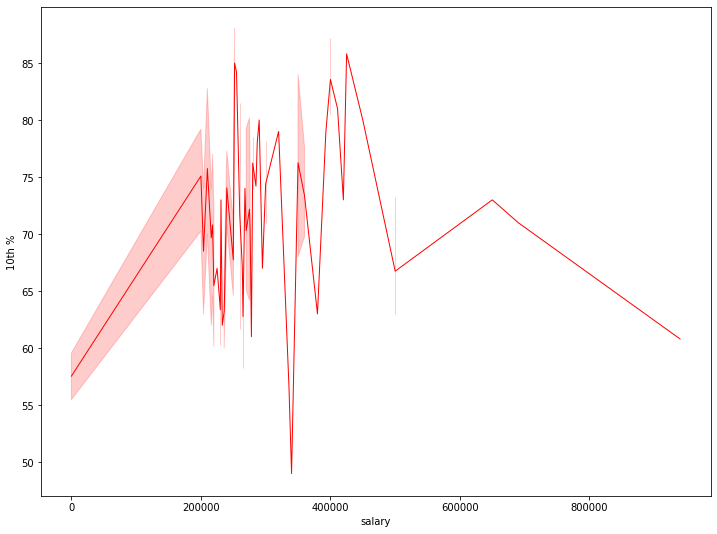

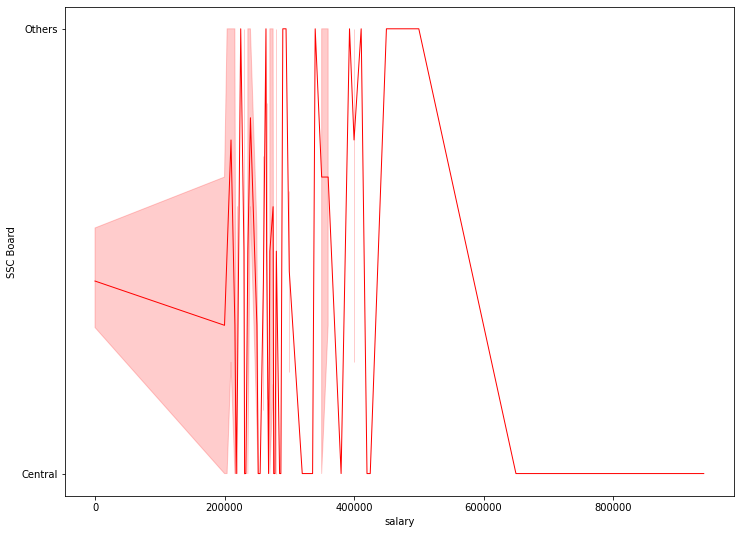

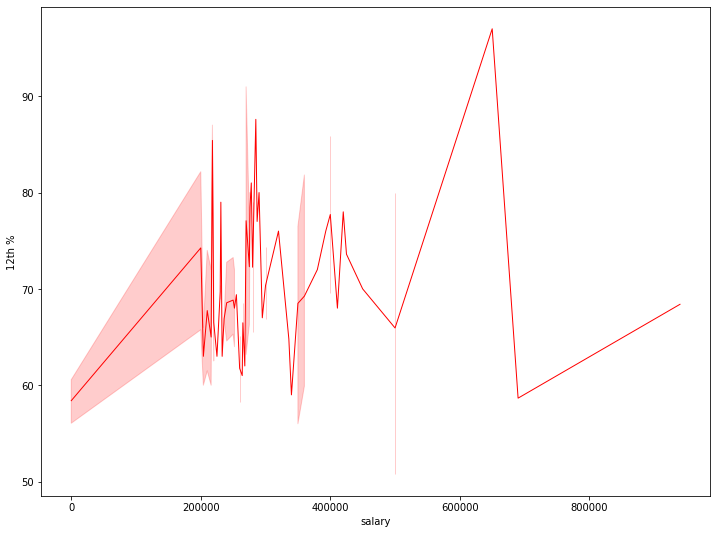

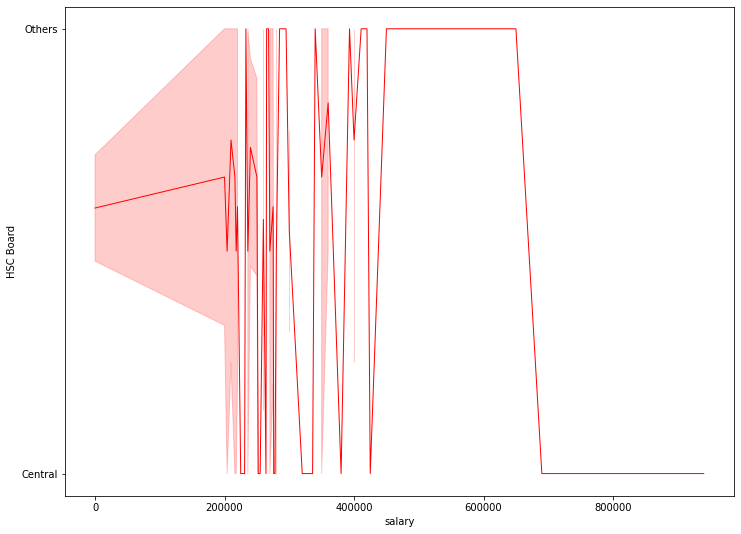

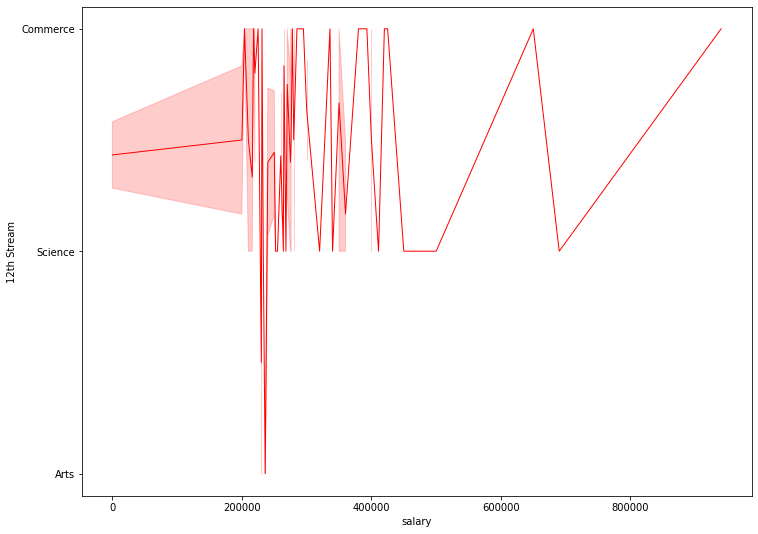

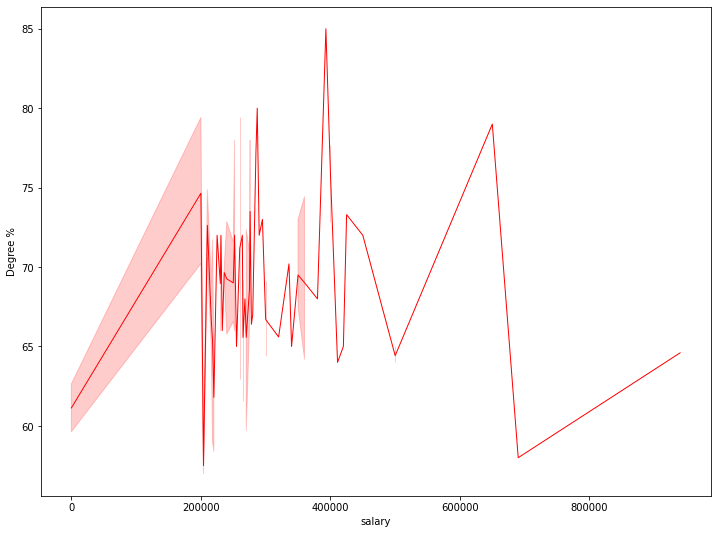

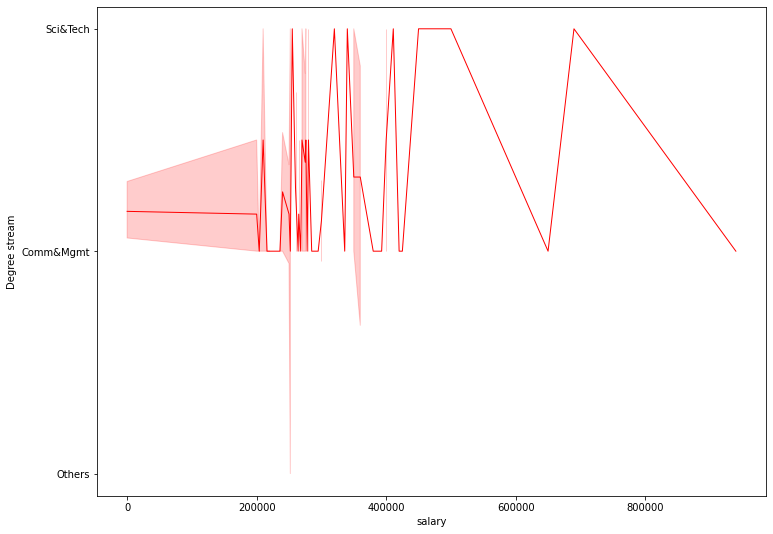

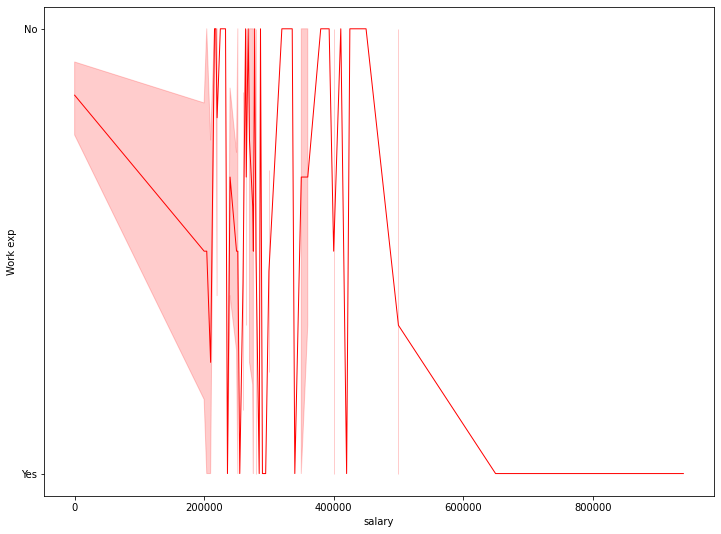

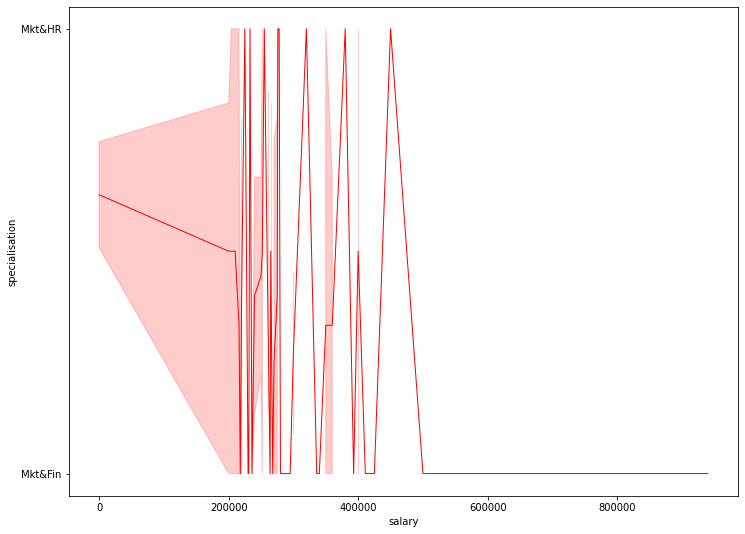

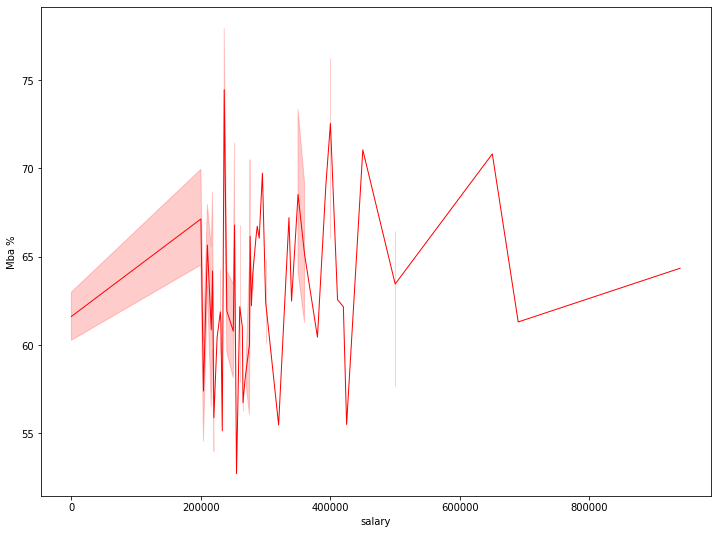

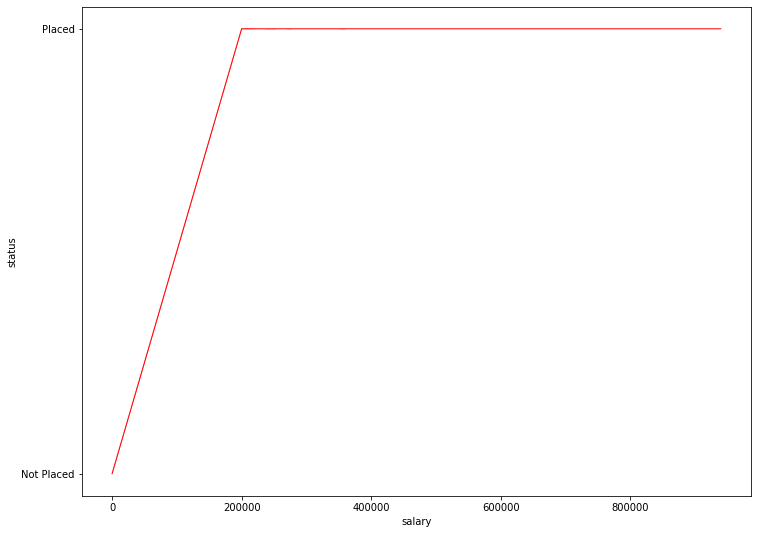

In [46]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.lineplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

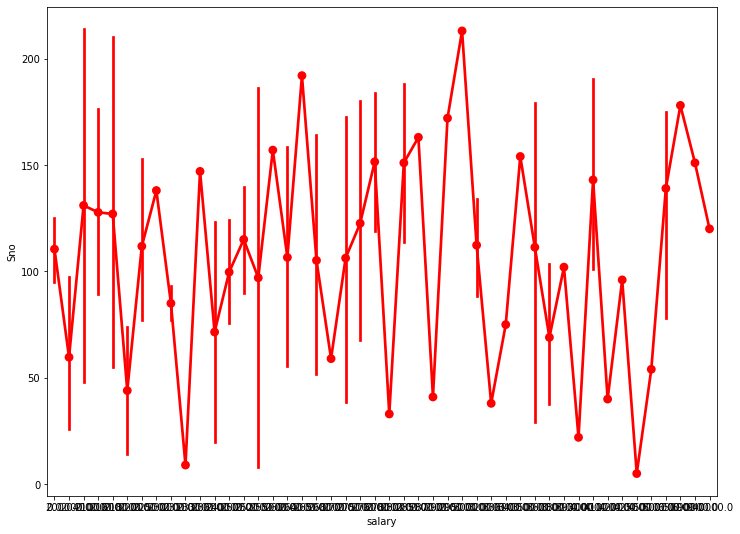

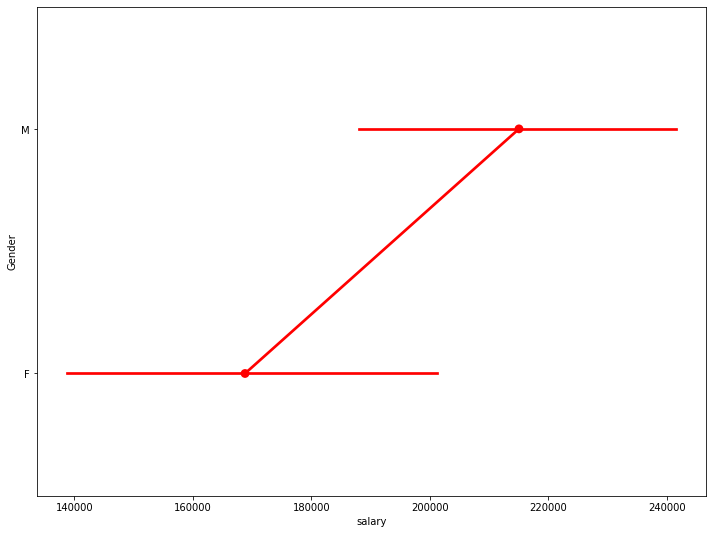

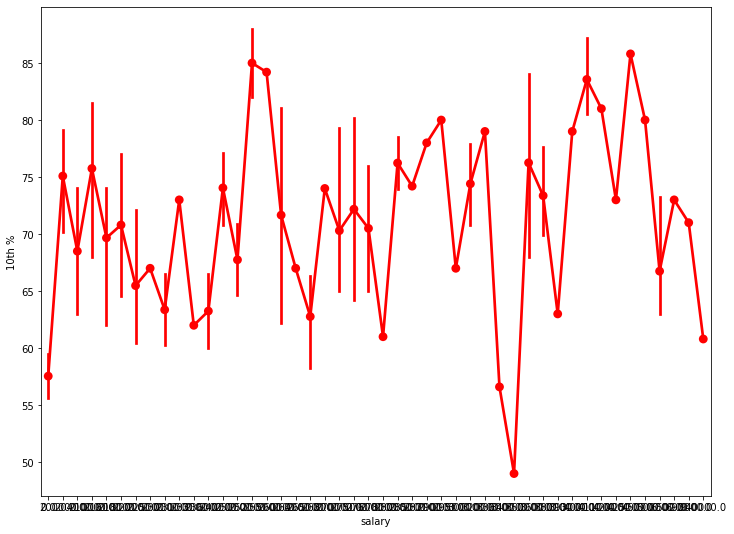

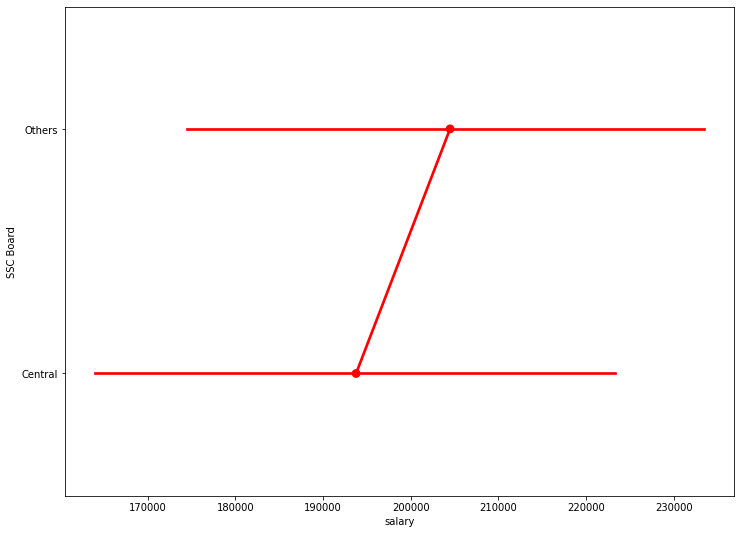

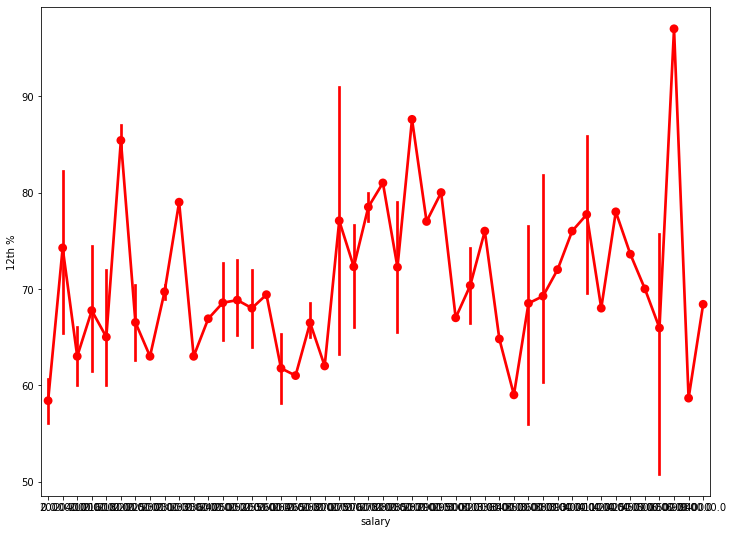

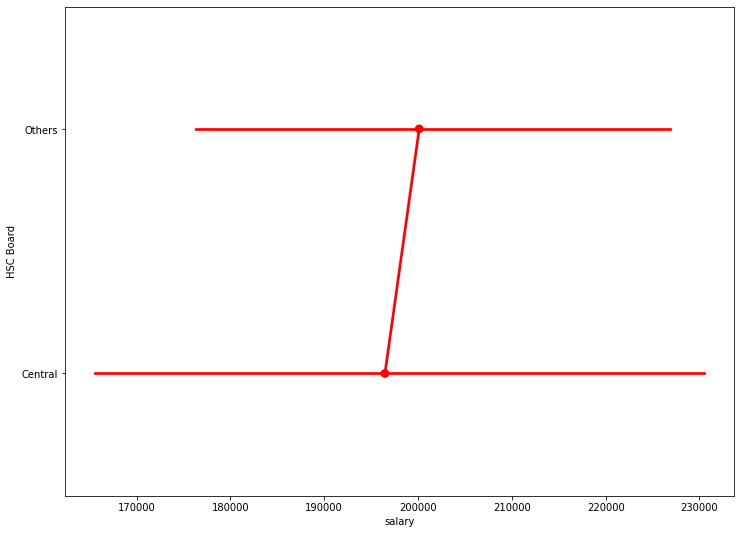

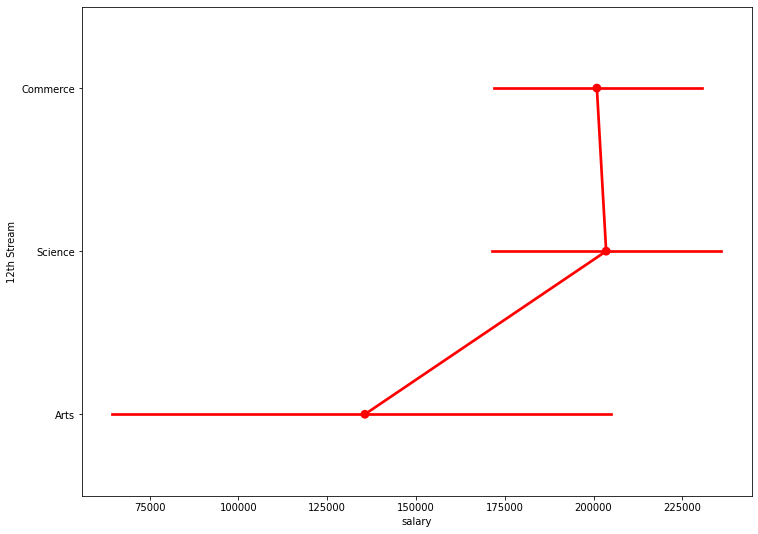

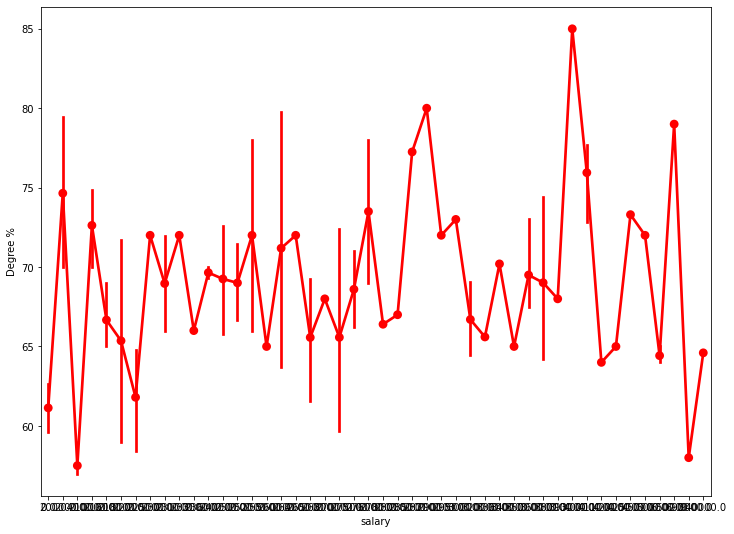

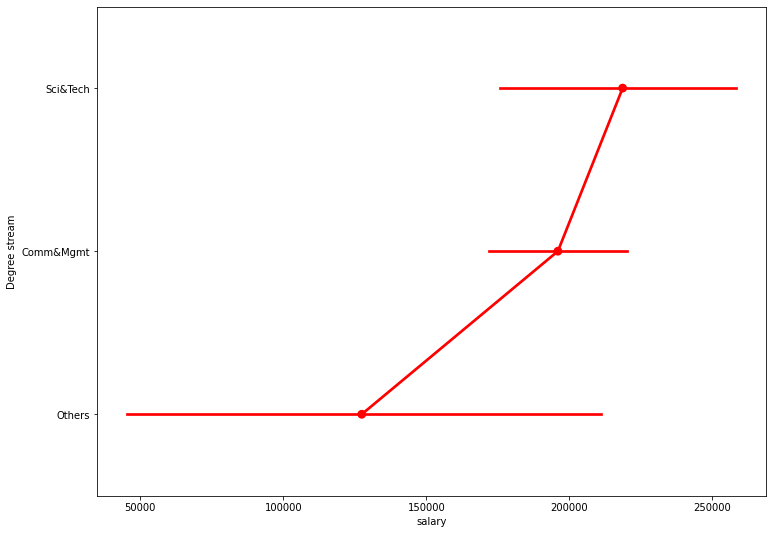

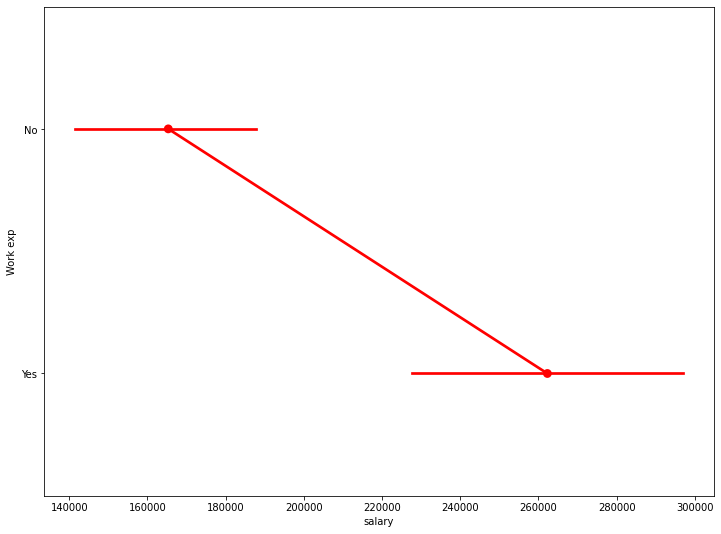

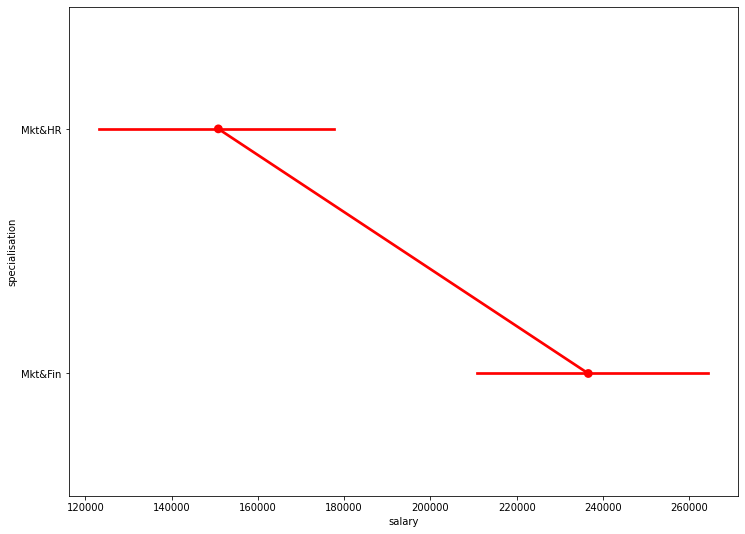

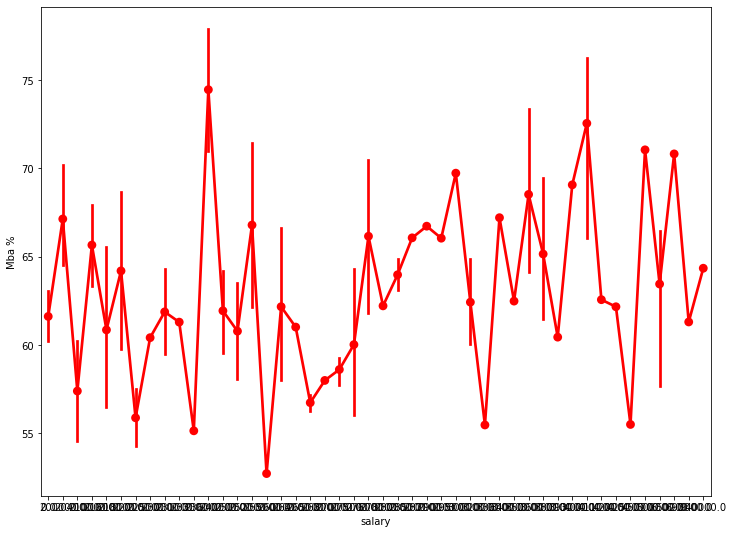

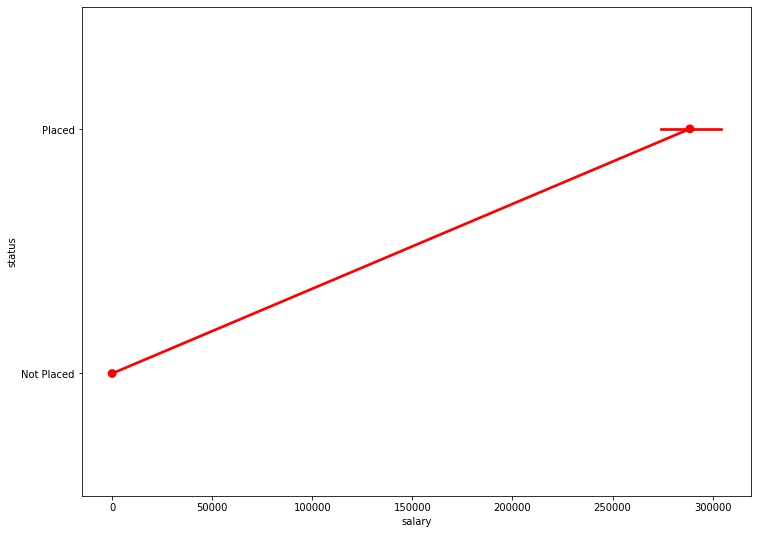

In [47]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.pointplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

<Figure size 864x648 with 0 Axes>

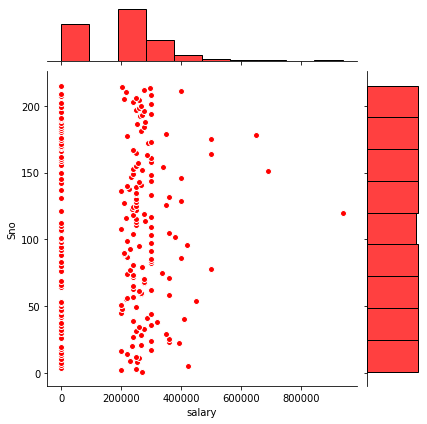

<Figure size 864x648 with 0 Axes>

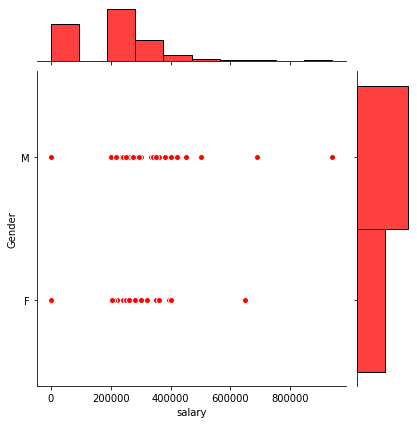

<Figure size 864x648 with 0 Axes>

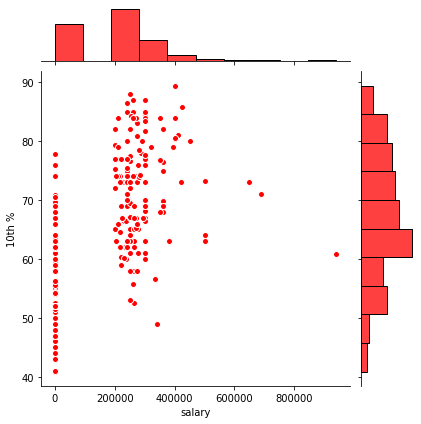

<Figure size 864x648 with 0 Axes>

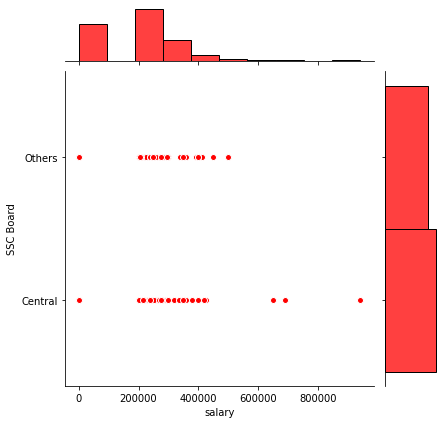

<Figure size 864x648 with 0 Axes>

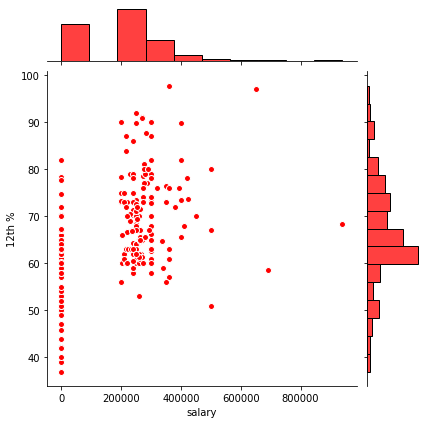

<Figure size 864x648 with 0 Axes>

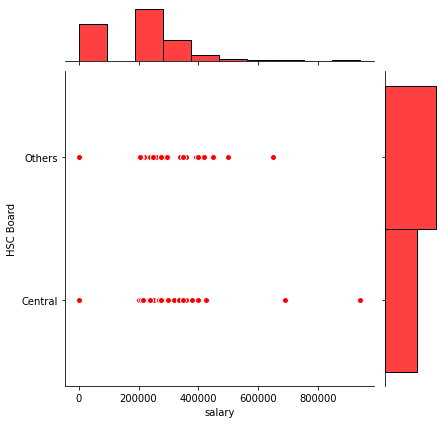

<Figure size 864x648 with 0 Axes>

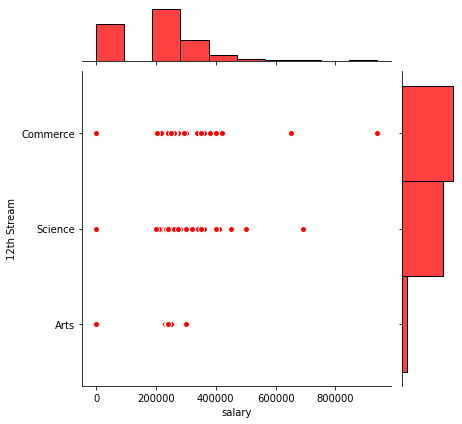

<Figure size 864x648 with 0 Axes>

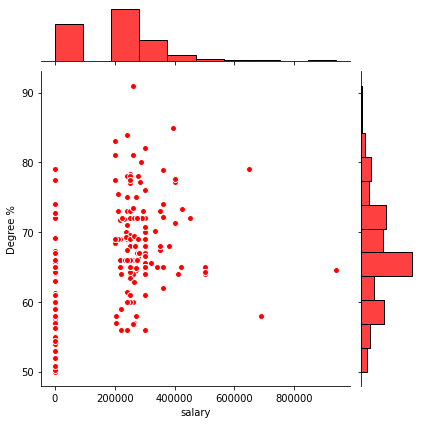

<Figure size 864x648 with 0 Axes>

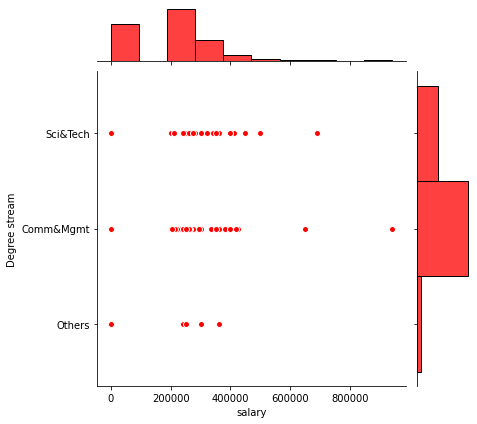

<Figure size 864x648 with 0 Axes>

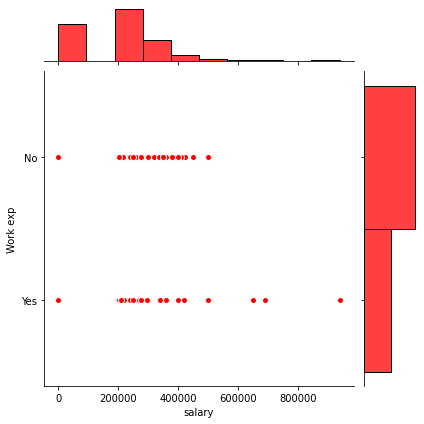

<Figure size 864x648 with 0 Axes>

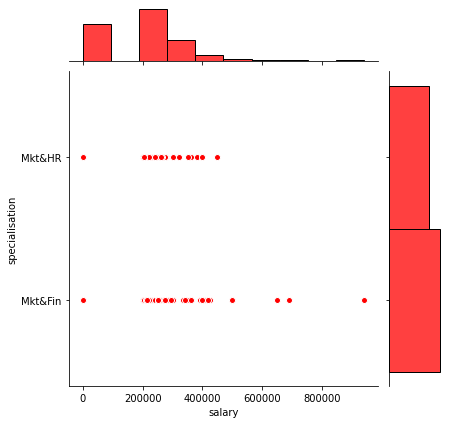

<Figure size 864x648 with 0 Axes>

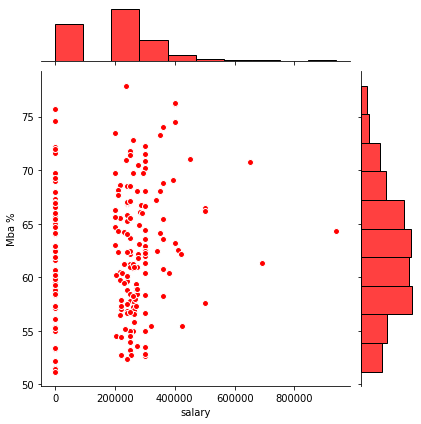

<Figure size 864x648 with 0 Axes>

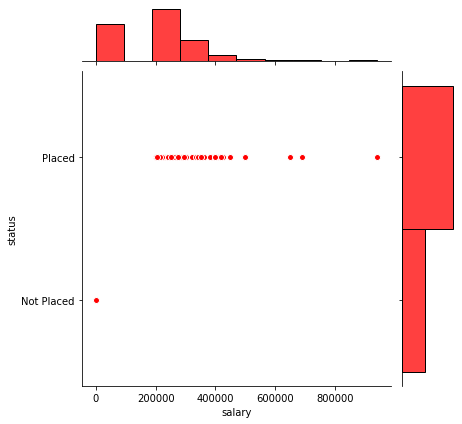

In [49]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.jointplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

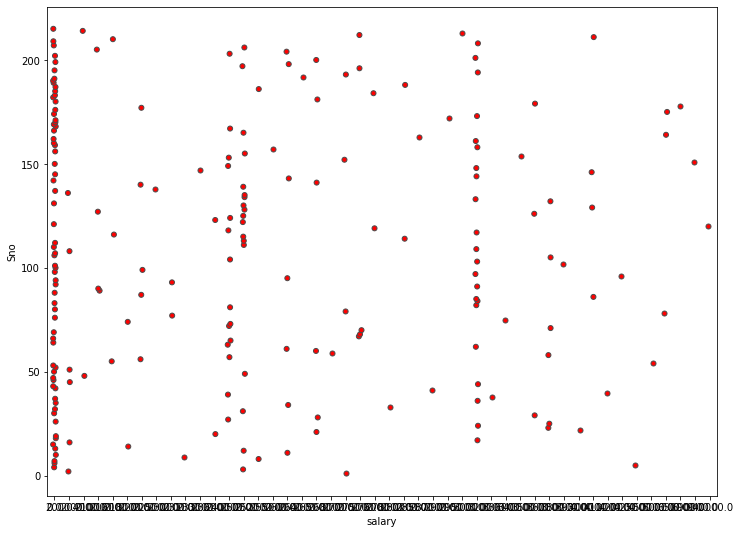

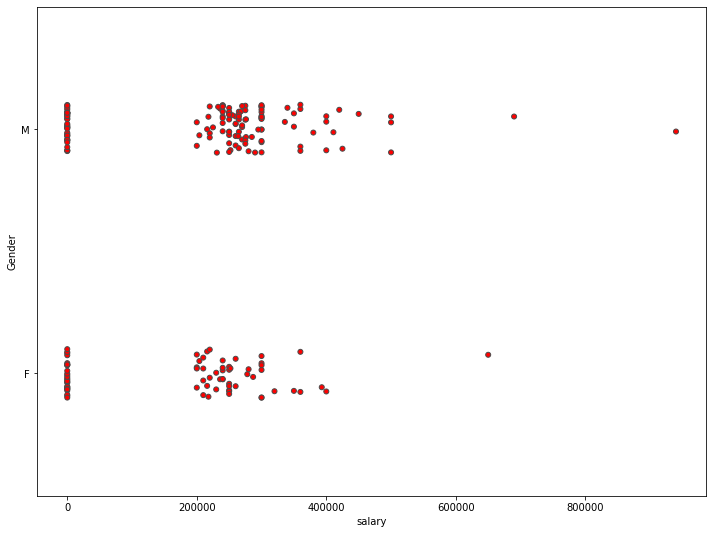

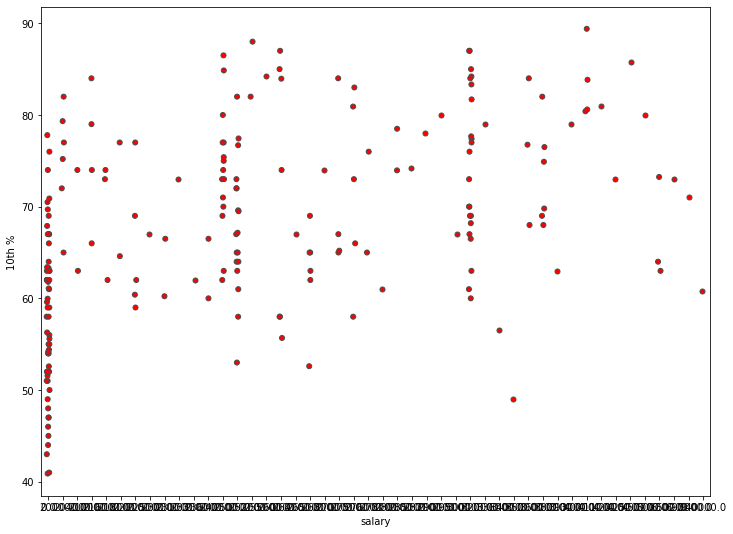

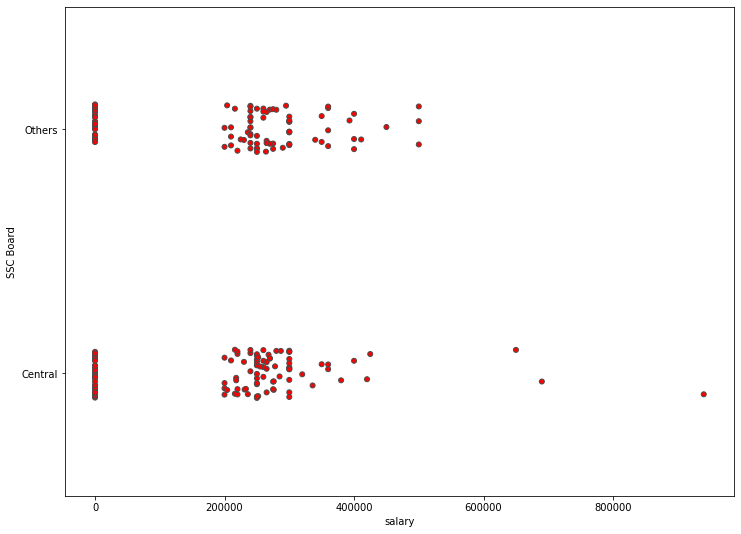

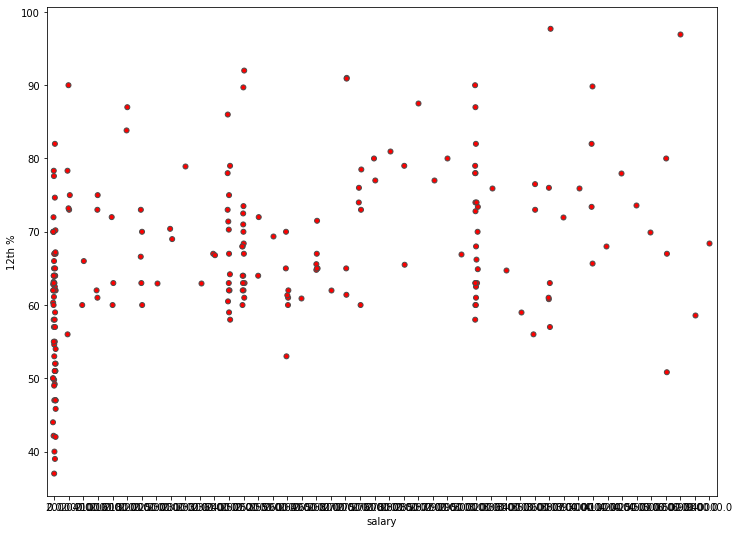

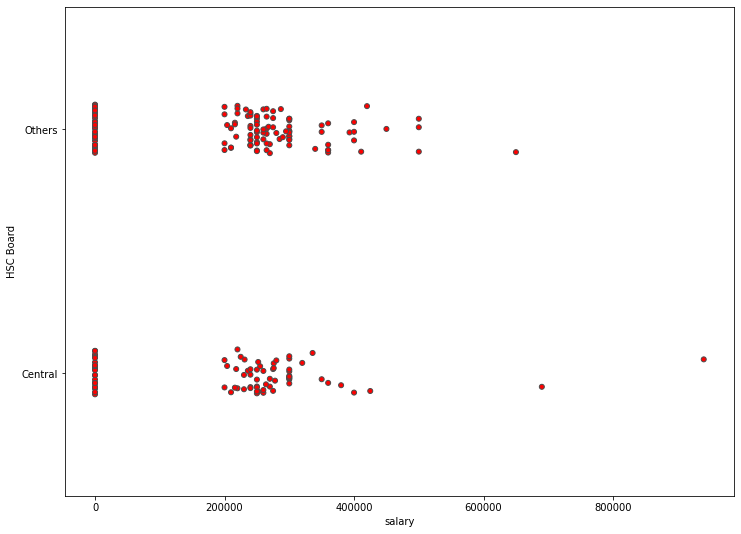

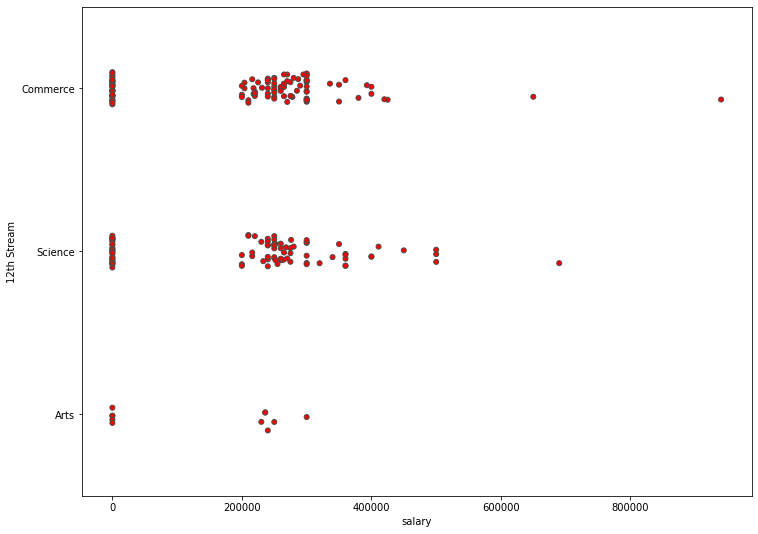

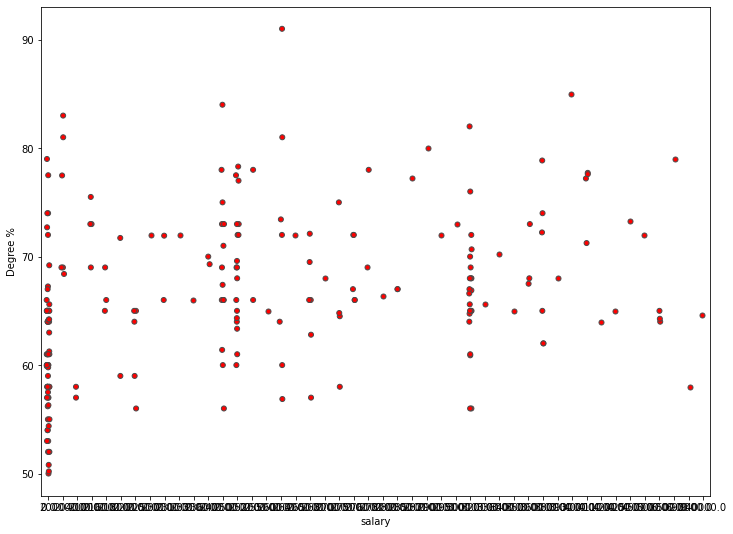

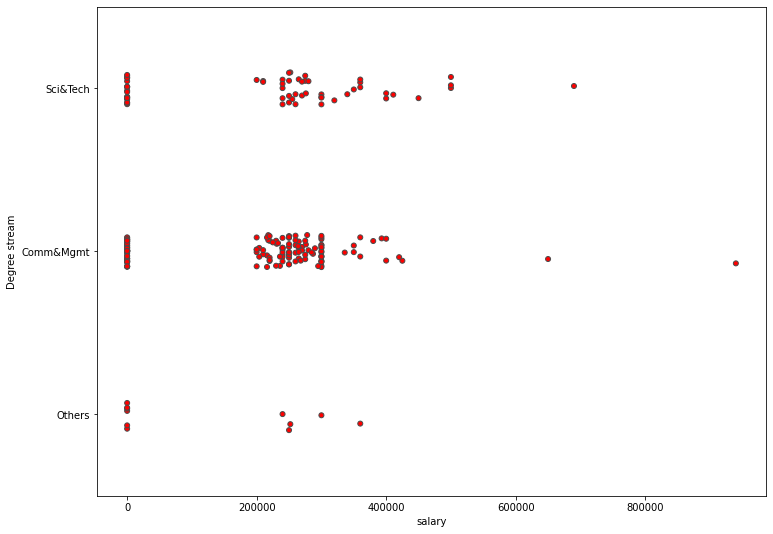

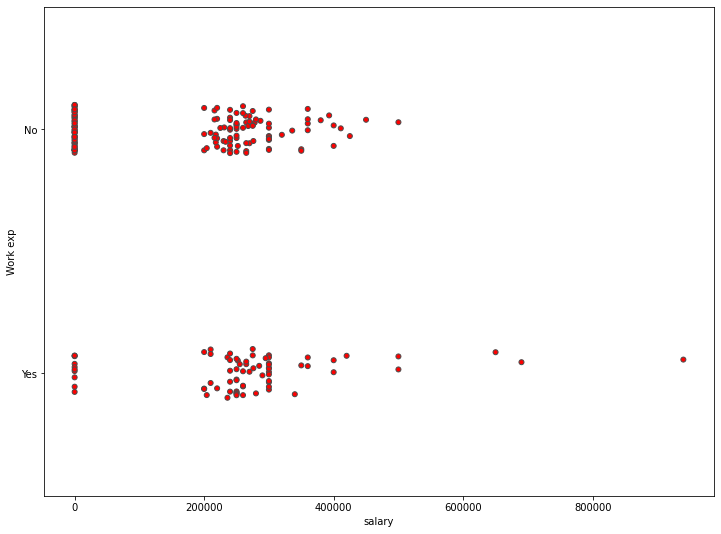

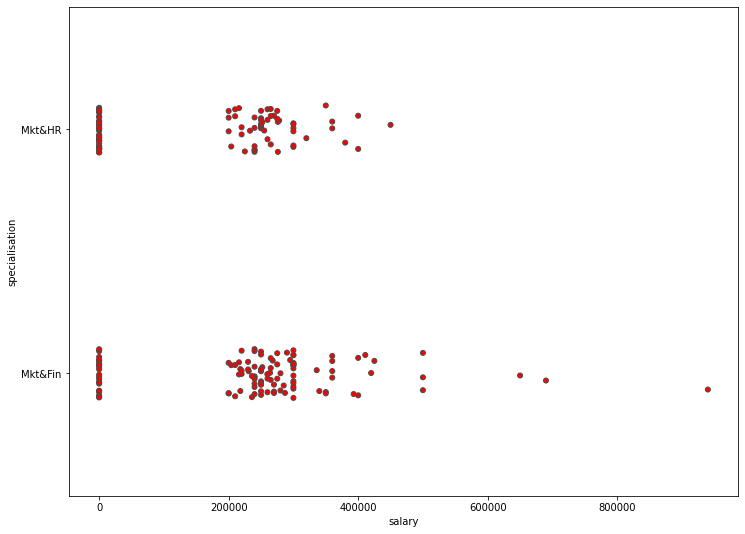

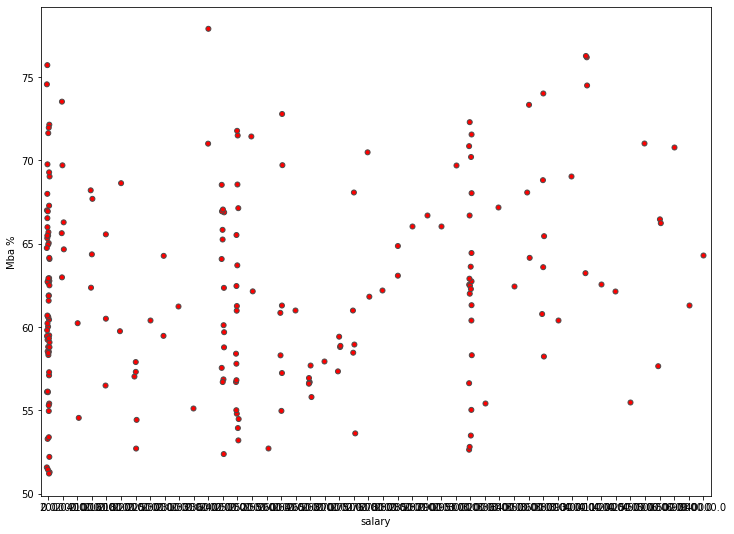

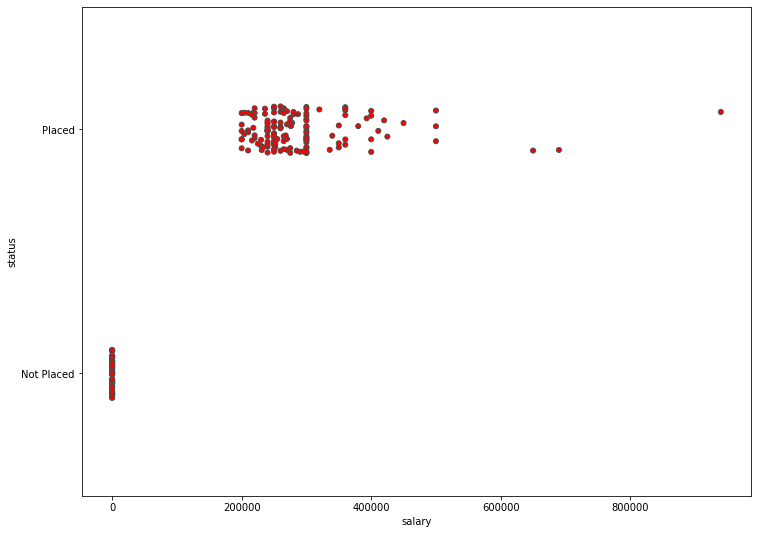

In [50]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.stripplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

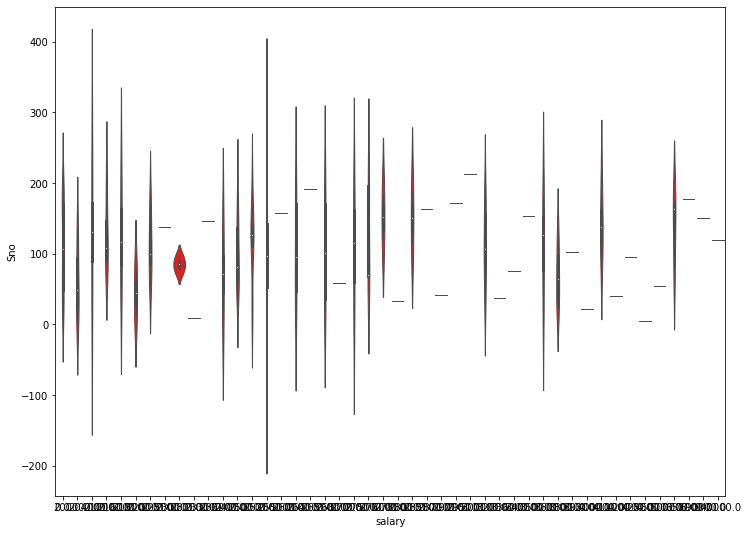

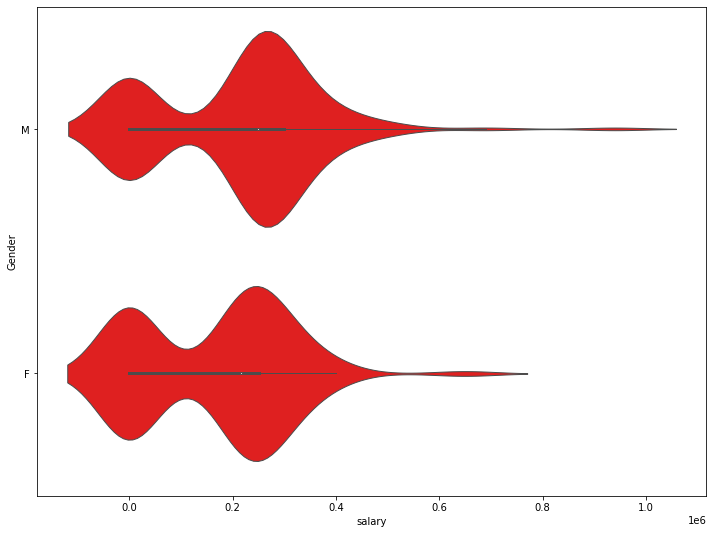

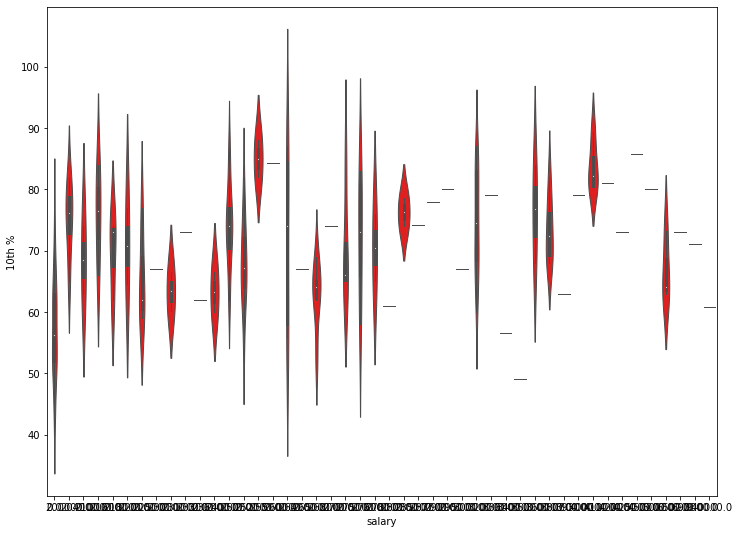

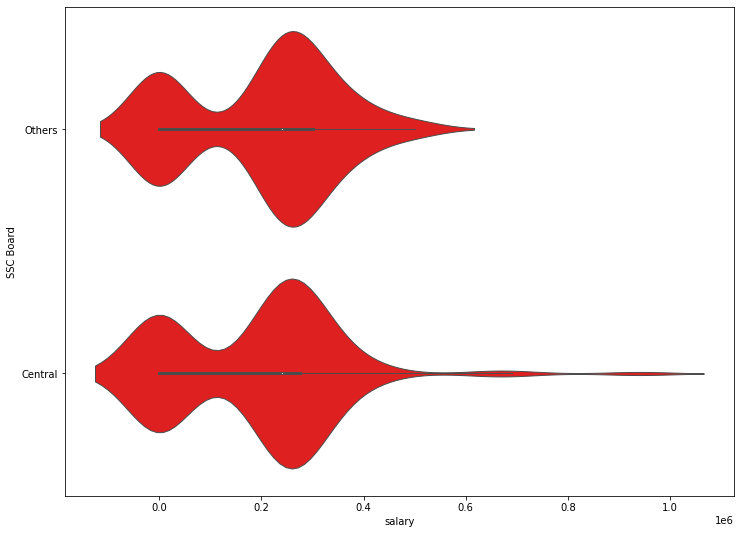

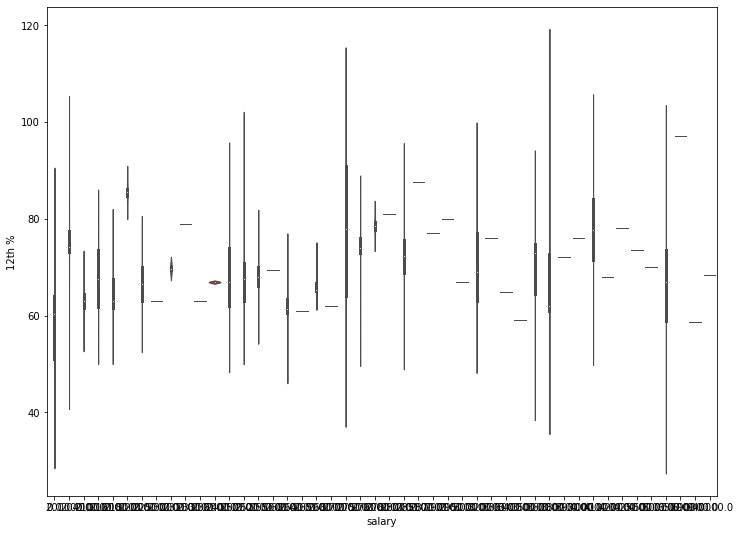

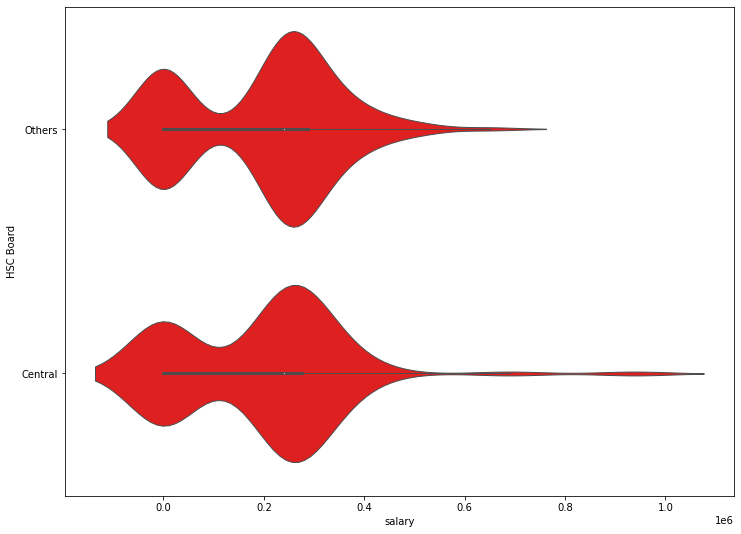

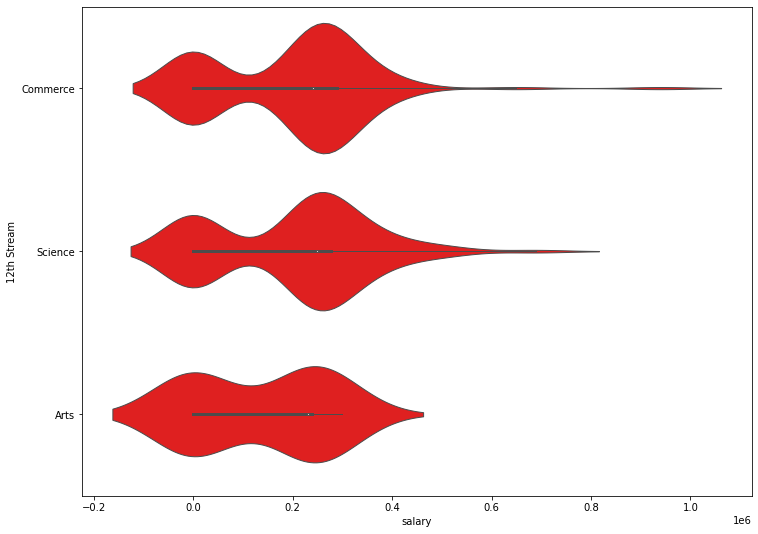

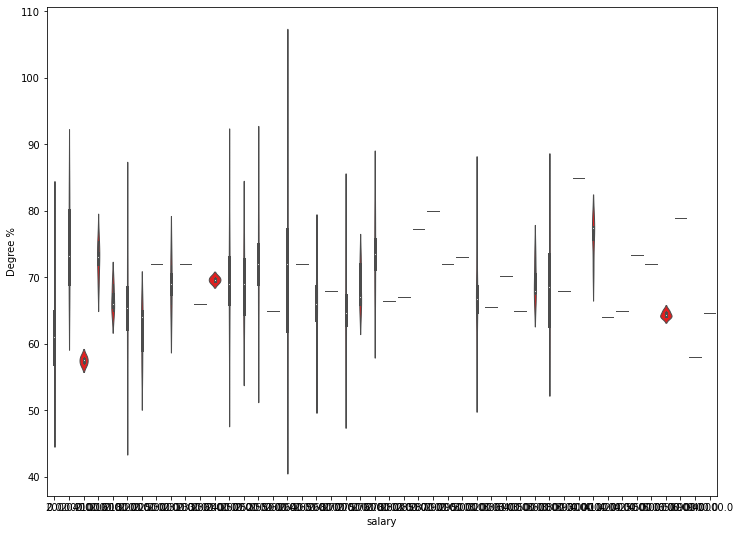

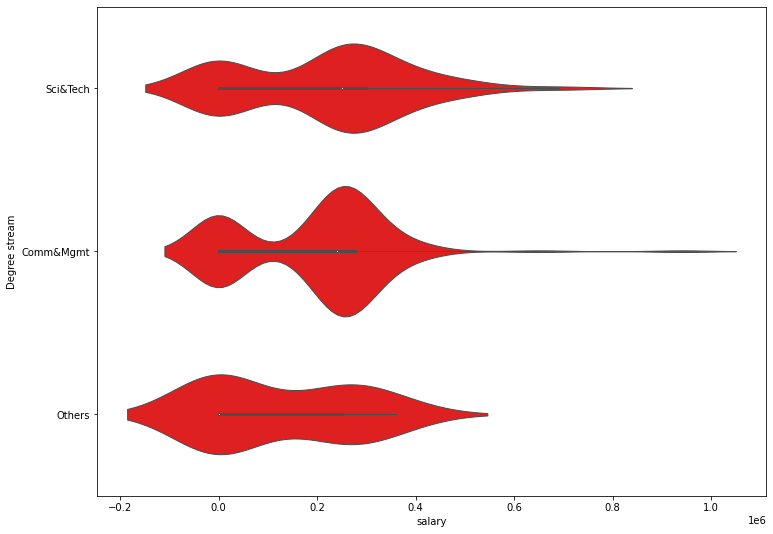

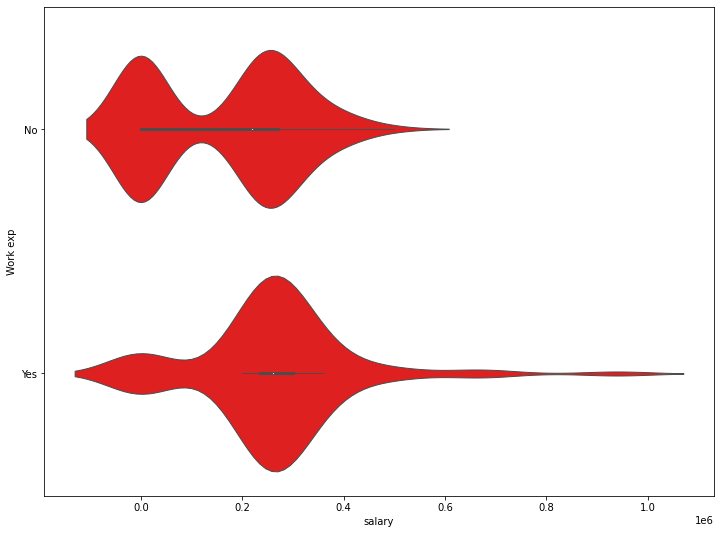

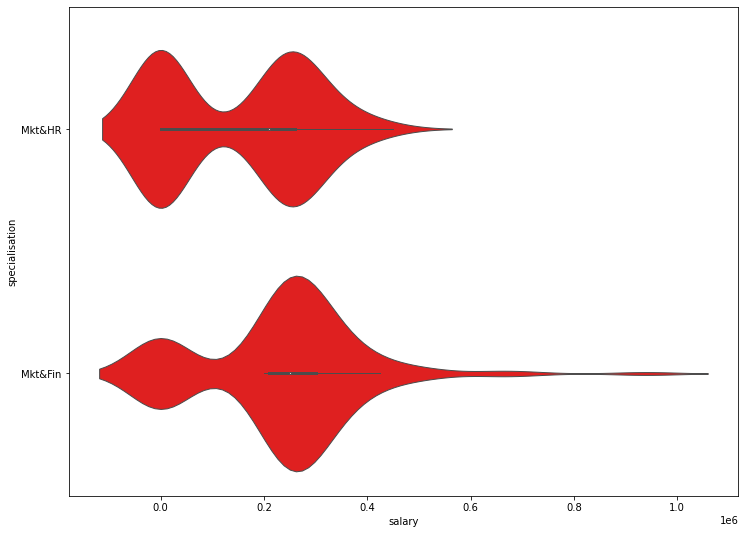

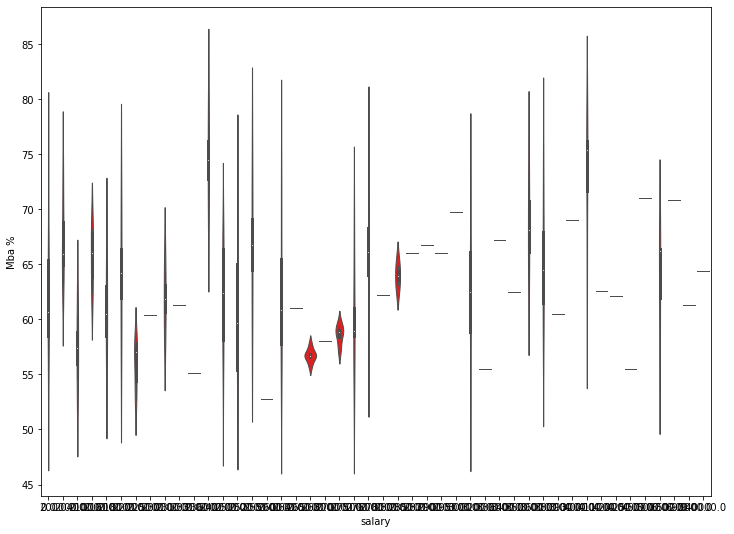

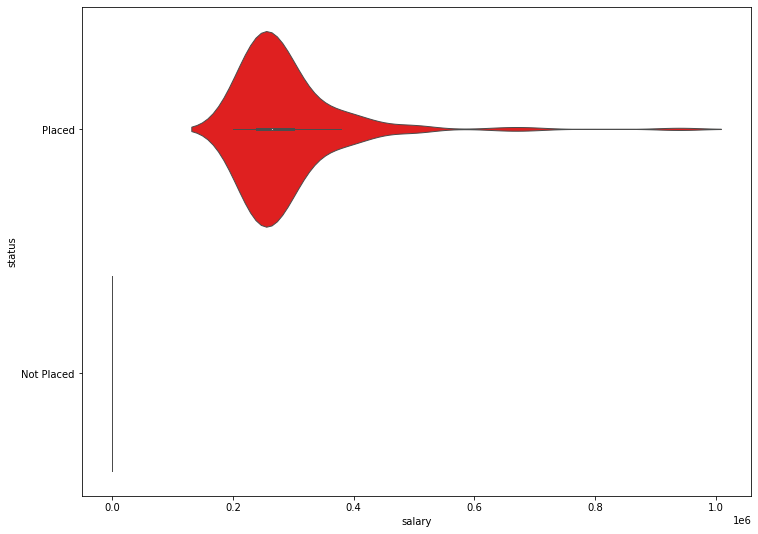

In [51]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.violinplot(x=df.salary,y=df[i],data=df,linewidth=1,color='red')
    plt.show()

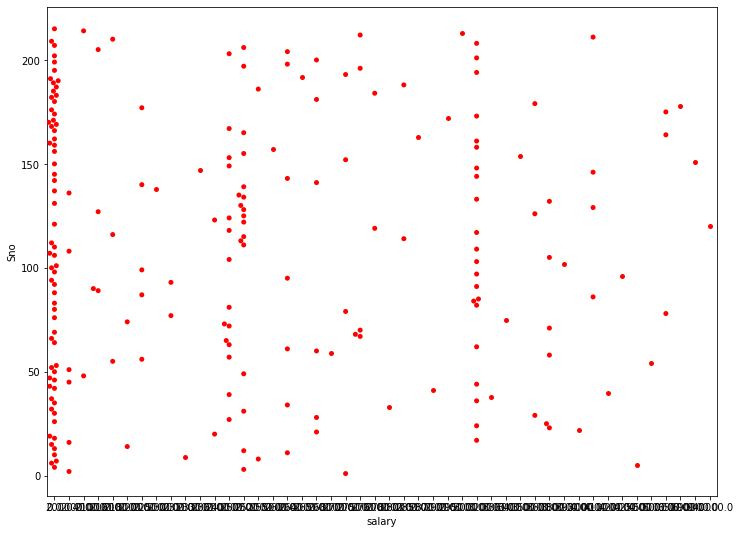

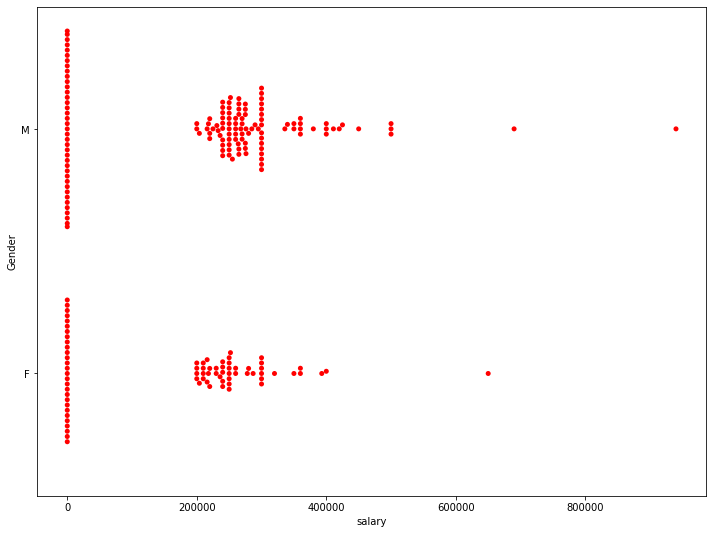

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


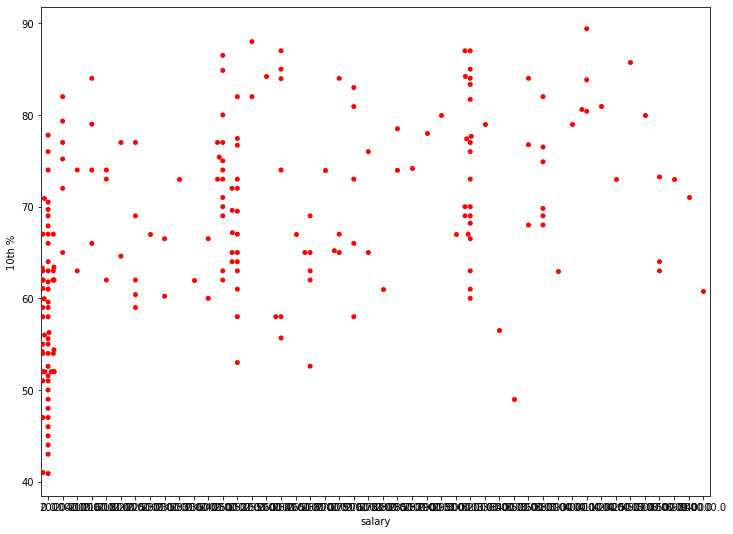

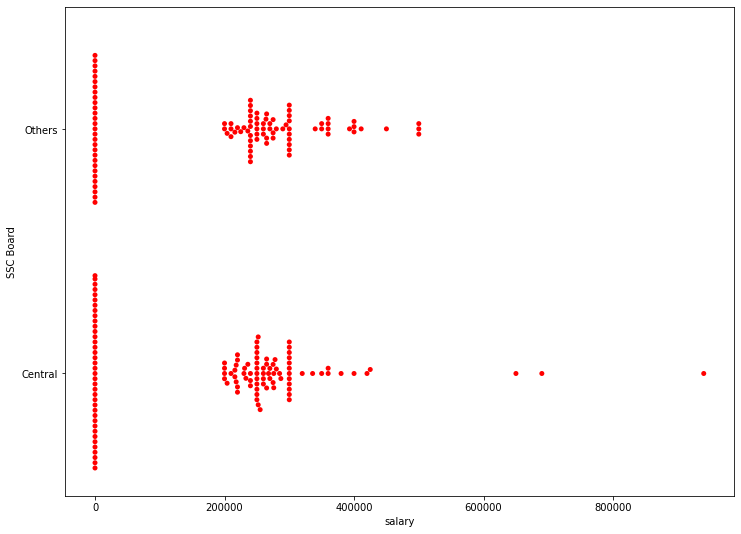

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


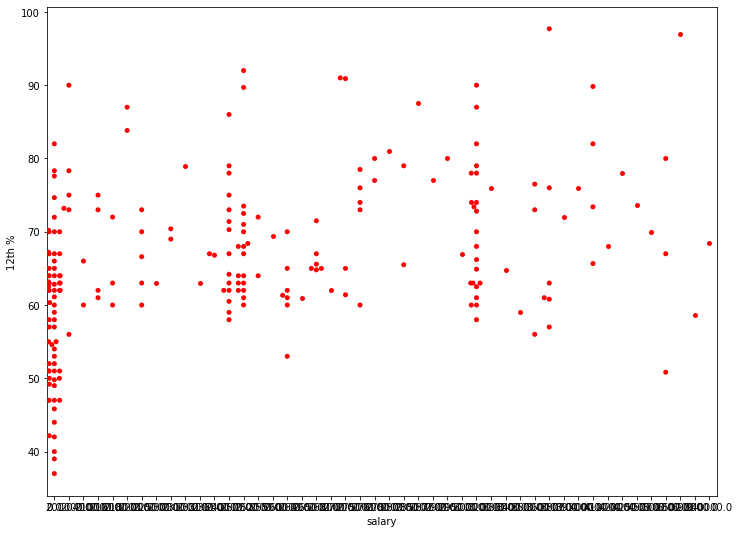

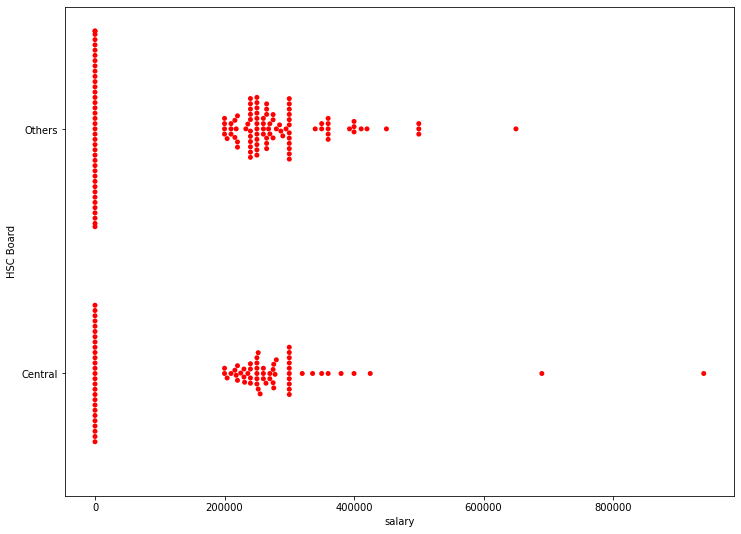

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


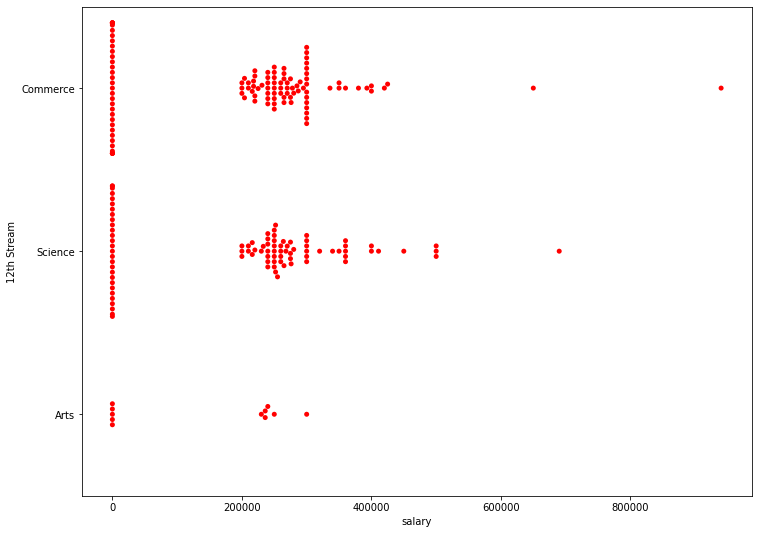

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


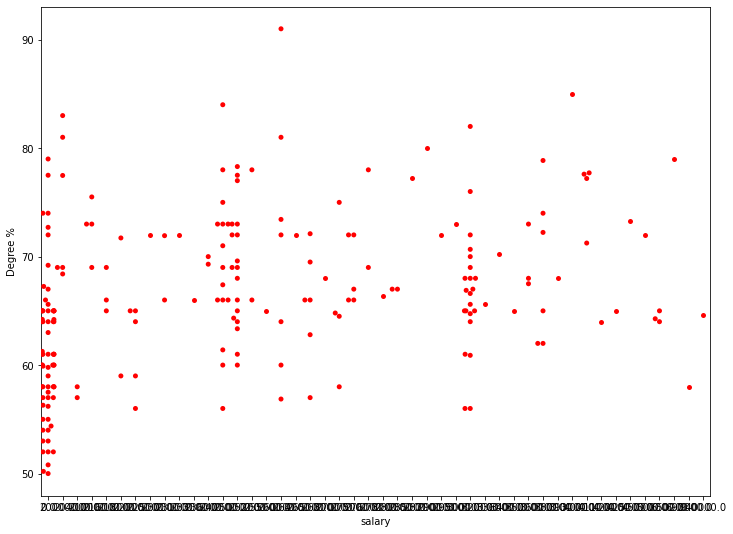

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


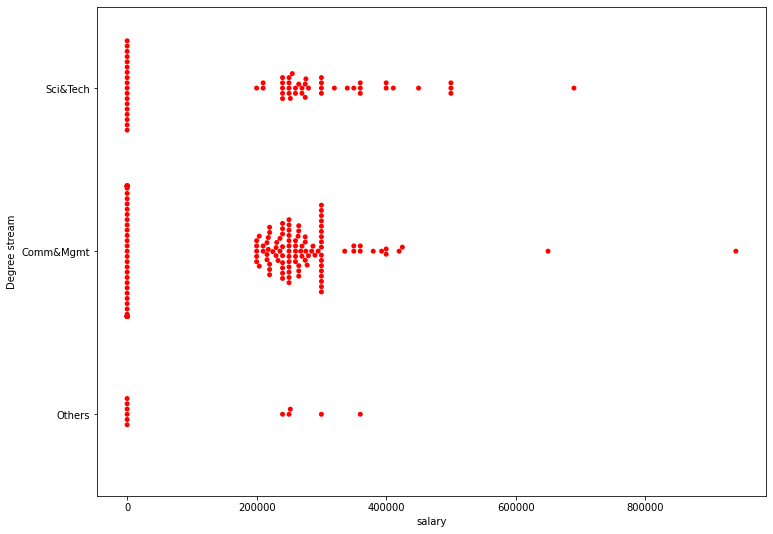

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


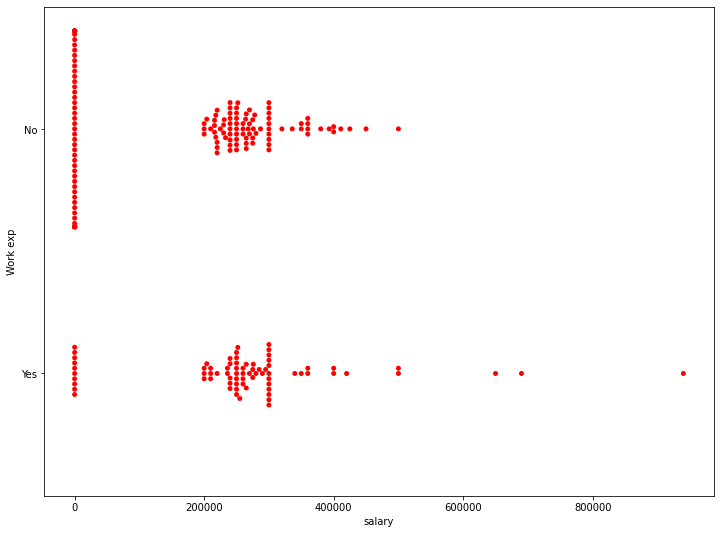

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


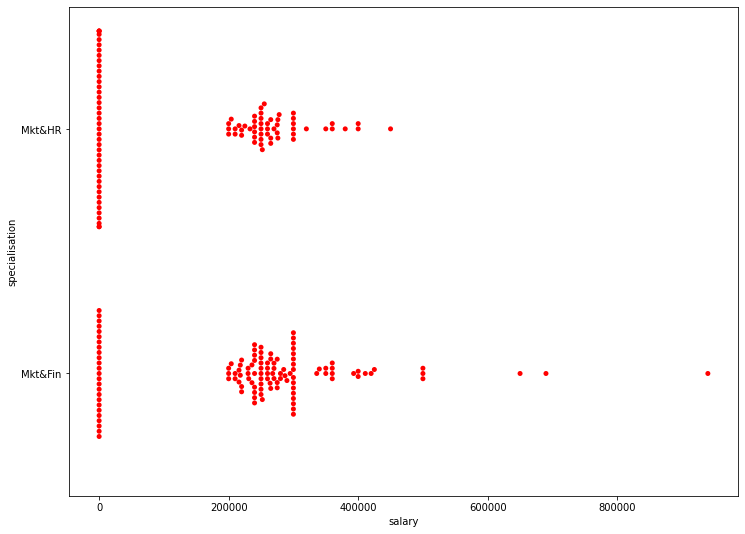

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


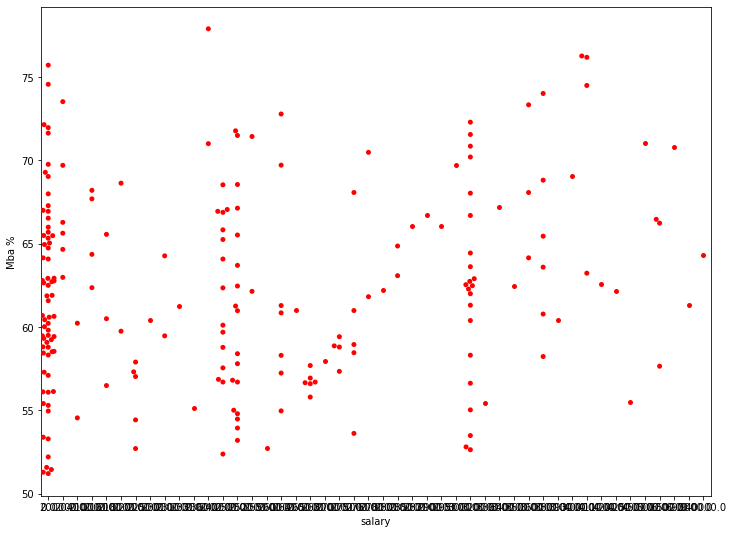

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


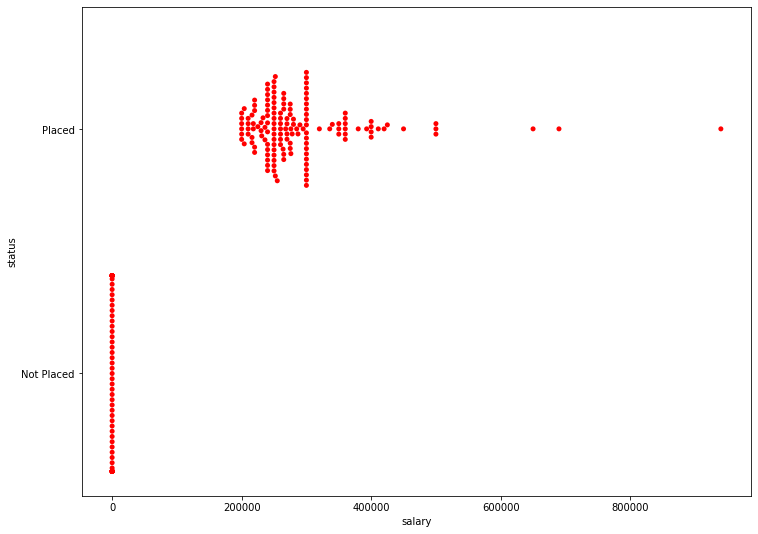

In [54]:
for i in ['Sno', 'Gender', '10th %', 'SSC Board', '12th %', 'HSC Board',
       '12th Stream', 'Degree %', 'Degree stream', 'Work exp',
       'specialisation', 'Mba %', 'status']:
    plt.figure(figsize=(12,9))
    sns.swarmplot(x=df.salary,y=df[i],data=df,color='red')
    plt.show()

In [55]:
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

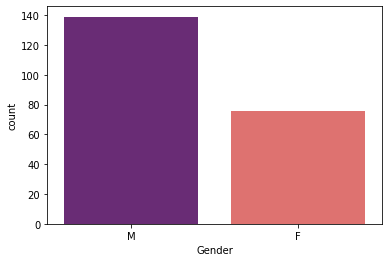

In [56]:
sns.countplot(x='Gender',data=df,palette='magma')

<AxesSubplot:xlabel='status', ylabel='count'>

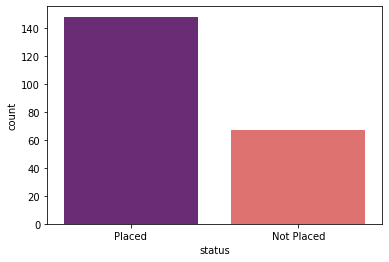

In [58]:
sns.countplot(x='status',data=df,palette='magma')

<AxesSubplot:xlabel='HSC Board', ylabel='count'>

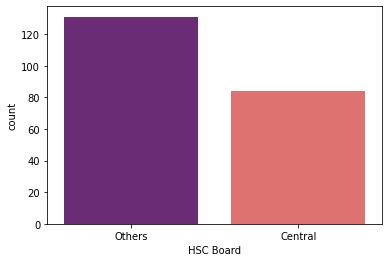

In [60]:
sns.countplot(x='HSC Board',data=df,palette='magma')

<AxesSubplot:xlabel='SSC Board', ylabel='count'>

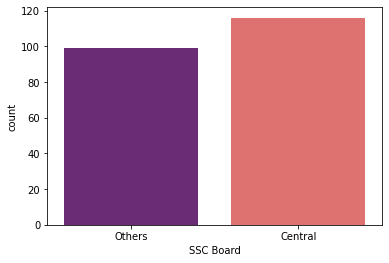

In [61]:
sns.countplot(x='SSC Board',data=df,palette='magma')

In [62]:
list(df.columns)

['Sno',
 'Gender',
 '10th %',
 'SSC Board',
 '12th %',
 'HSC Board',
 '12th Stream',
 'Degree %',
 'Degree stream',
 'Work exp',
 'specialisation',
 'Mba %',
 'status',
 'salary']

In [67]:
import sweetviz as sv

In [68]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [69]:
from IPython.display import IFrame

In [70]:
IFrame(src='Analyze.html',width=1000,height=600)